**Data Wrangling - Transforming and Merging datasets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# installs

!pip install tensorflow-addons -q
!pip install tokenization -q 
#!pip install -U tensorflow-text -q
!pip install transformers -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 25.9 MB/s eta 0:00:00


In [ ]:
import numpy as np

predictions = [0.2,0.3,0.1,0.4]

#np.argmax(.astype(int),axis = 1)

(np.array(predictions) > 0.1).astype(int)

array([1, 1, 0, 1])

In [ ]:
#imports 
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer                         
import string
from nltk.stem import WordNetLemmatizer
import re
import nltk
import numpy as np
import gc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm
from sklearn.naive_bayes import MultinomialNB

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm as tqdm
import tensorflow

from sklearn.neighbors import KNeighborsClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm as tqdm
import tensorflow as tf
from tensorflow.keras.layers import LSTM
import gc
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ProgbarLogger, ModelCheckpoint
from tensorflow.python.profiler import profiler_client
import datetime 

import transformers
from transformers import BertTokenizer
from transformers import TFAutoModel
import tensorflow_addons as tfa

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:

# Load the old csv datasets into a pandas DataFrames
cols_to_use = ['text', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 
               'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 
               'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 
               'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 
               'surprise', 'neutral']

df_old1 = pd.read_csv('/content/drive/MyDrive/GoEmotions_Priyanka/goemotions_1.csv', usecols=cols_to_use)
df_old2 = pd.read_csv('/content/drive/MyDrive/GoEmotions_Priyanka/goemotions_2.csv', usecols=cols_to_use)
df_old3 = pd.read_csv('/content/drive/MyDrive/GoEmotions_Priyanka/goemotions_3.csv', usecols=cols_to_use)

# Concatenate the old DataFrames into a new DataFrame
df_old = pd.concat([df_old1, df_old2, df_old3], ignore_index=True)

# Use list comprehension to extract the emotion for each row that has a value of 1
df_new = pd.DataFrame({'text': df_old['text'], 'emotion': [row[row == 1].index.tolist()[0] if len(row[row == 1].index.tolist()) > 0 else 'neutral' for _, row in df_old.iloc[:, 1:].iterrows()]})

# Save the new dataset to a csv file
df_new.to_csv('/content/drive/MyDrive/GoEmotions_Priyanka/transformed.csv', index=False)


**Data Preprocessing - Cleaning and Lemmatizing data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/GoEmotions_Priyanka/transformed.csv')

def clean(dirtytext): 
    # removing punctuations
    step1 = "".join([i for i in dirtytext if i not in string.punctuation])
    
    # lowercase the letters
    step2 = "".join([i.lower() for i in step1])
    
    # removing special characters
    step3 = re.sub('[^A-Za-z0-9.]+', ' ', step2)
    
    # removing hyperlinks
    step4 = re.sub(r'http\S+', '', step3)

    # tokenizing words
    words = nltk.tokenize.word_tokenize(step4)
    
    # removing stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    step5 = [i for i in words if i not in stopwords]
    
    # used lemmatization
    lemmatizer = WordNetLemmatizer()
    cleantext = [lemmatizer.lemmatize(word) for word in step5]
    cleantext = " ".join(cleantext)
    return cleantext

for i in range(len(df)):
    df.iloc[i].text = clean(df.iloc[i].text)

df.to_csv('/content/drive/MyDrive/GoEmotions_Priyanka/cleaned.csv', index=False)


**Converting labels into numeric values**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/GoEmotions_Priyanka/cleaned.csv')
df['emotion'] = le.fit_transform(df['emotion'].values)
df = df[:10000]
df = df.dropna()

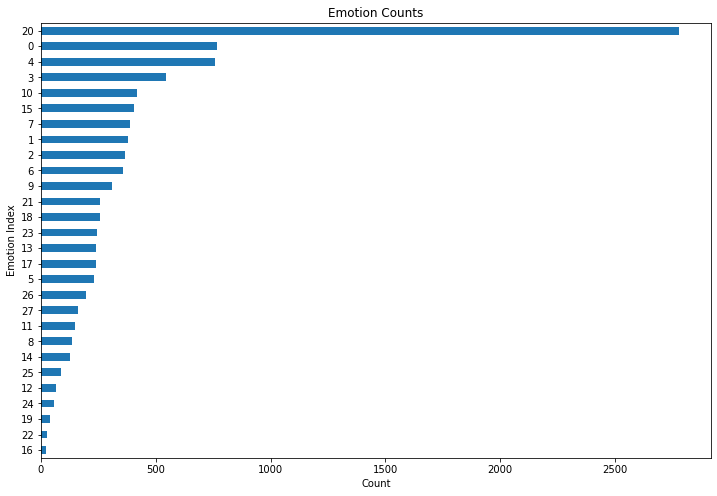

In [ ]:
plt.figure(figsize = (12,8))

df['emotion'].value_counts().sort_values().plot(kind='barh')

plt.title('Emotion Counts')
plt.xlabel('Count')
plt.ylabel('Emotion Index')

plt.show()

In [ ]:
vectorizer_tfidf = TfidfVectorizer(stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1,4))
features_tfidf = vectorizer_tfidf.fit_transform(list(df['text']))

vectorizer_bow = CountVectorizer(stop_words="english", ngram_range=(1,4))
features_bow = vectorizer_bow.fit_transform(list(df['text']))

In [ ]:
print(type(features_tfidf))
print(features_tfidf)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 51178)	0.7949361813852096
  (0, 71163)	0.4796375453442643
  (0, 50880)	0.3715162077498502
  (1, 75534)	0.18203722067134212
  (1, 132895)	0.18203722067134212
  (1, 121535)	0.18203722067134212
  (1, 101679)	0.18203722067134212
  (1, 19923)	0.18203722067134212
  (1, 59843)	0.18203722067134212
  (1, 156154)	0.18203722067134212
  (1, 46108)	0.18203722067134212
  (1, 75533)	0.18203722067134212
  (1, 132894)	0.18203722067134212
  (1, 121534)	0.18203722067134212
  (1, 101678)	0.18203722067134212
  (1, 19922)	0.18203722067134212
  (1, 59842)	0.18203722067134212
  (1, 156153)	0.18203722067134212
  (1, 46107)	0.1756004507728715
  (1, 75532)	0.18203722067134212
  (1, 132893)	0.18203722067134212
  (1, 121533)	0.18203722067134212
  (1, 101677)	0.1756004507728715
  (1, 19921)	0.18203722067134212
  (1, 59841)	0.18203722067134212
  :	:
  (210794, 129976)	0.21989315199727485
  (210794, 37077)	0.2726951808728964
  (210794, 4662)	0.14731312325343826
  (210794, 

In [ ]:
X = features_tfidf
y = df['emotion'].values.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a Logistic Regression model
lr_model = LogisticRegression(max_iter = 200)

# Train the model on the training set
lr_model.fit(X_train, y_train)

# Predict the target values for the testing set
y_pred_prob = lr_model.predict_proba(X_test)

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for threshold in thresholds:
    y_pred = np.argmax((y_pred_prob > threshold).astype(int),axis = 1)
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    accuracy = accuracy_score(y_test, y_pred)
    print('Threshold: {:.1f} \t F1 score: {:.4f}'.format(threshold, f1))
    print('Threshold: {:.1f} \t Accuracy score: {:.4f}'.format(threshold, accuracy))

gc.collect()

In [ ]:
# Create a Logistic Regression model
lr_model = LogisticRegression(max_iter = 200)

# Train the model on the training set
lr_model.fit(X_train, y_train)

# Predict the target values for the testing set
y_pred_prob = lr_model.predict_proba(X_test)

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for threshold in thresholds:
    y_pred = np.argmax((y_pred_prob > threshold).astype(int),axis = 1)
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    accuracy = accuracy_score(y_test, y_pred)
    print('Threshold: {:.1f} \t F1 score: {:.4f}'.format(threshold, f1))
    print('Threshold: {:.1f} \t Accuracy score: {:.4f}'.format(threshold, accuracy))

gc.collect()

Threshold: 0.1 	 F1 score: 0.2881
Threshold: 0.1 	 Accuracy score: 0.3260
Threshold: 0.2 	 F1 score: 0.2898
Threshold: 0.2 	 Accuracy score: 0.3595
Threshold: 0.3 	 F1 score: 0.2557
Threshold: 0.3 	 Accuracy score: 0.3215
Threshold: 0.4 	 F1 score: 0.2270
Threshold: 0.4 	 Accuracy score: 0.2704
Threshold: 0.5 	 F1 score: 0.1703
Threshold: 0.5 	 Accuracy score: 0.1898
Threshold: 0.6 	 F1 score: 0.1271
Threshold: 0.6 	 Accuracy score: 0.1492
Threshold: 0.7 	 F1 score: 0.0946
Threshold: 0.7 	 Accuracy score: 0.1242
Threshold: 0.8 	 F1 score: 0.0609
Threshold: 0.8 	 Accuracy score: 0.1002
Threshold: 0.9 	 F1 score: 0.0263
Threshold: 0.9 	 Accuracy score: 0.0836


62

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

val_accs = np.zeros(5) 

for fold_idx, (train_idx, val_idx) in enumerate(skf.split(X, y)):

    # Split the data into training and validation sets
    X_train_tfidf, y_train = X[train_idx], y[train_idx]
    X_val_tfidf, y_val = X[val_idx], y[val_idx]
    
    # Initialize the Random Forest Classifier
    rfc = RandomForestClassifier()
    
    for epoch in tqdm(range(10)):  # 10 epochs
        
        # Train the model on the training set
        rfc.fit(X_train_tfidf, y_train)
        
        # Predict the labels of the validation set and compute the accuracy
        y_val_pred = rfc.predict(X_val_tfidf)
        val_f1 = f1_score(y_val, y_val_pred, average='weighted')
        
        # Update the progress bar
        tqdm.write(f"Fold {fold_idx + 1}/{skf.n_splits} - Epoch {epoch + 1}/10 - Validation f1 score: {val_f1:.4f}")
    
    val_accs[fold_idx] = val_f1
   
    tqdm.write("=" * 80)

# Compute the average validation accuracy across all folds and epochs
avg_val_f1 = np.mean(val_accs)

# Display the final results
print("=" * 80)
print(f"Average validation f1 score: {avg_val_f1:.4f}")


Accuracy for 10k data Random Forest with tfidf is around 35%. 

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

val_accs = np.zeros(5) 

for fold_idx, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    
    # Split the data into training and validation sets
    X_train_tfidf, y_train = X[train_idx], y[train_idx]
    X_val_tfidf, y_val = X[val_idx], y[val_idx]
    
    # Initialize the Naive Bayes Classifier
    mnb = MultinomialNB()
    
    for epoch in tqdm(range(10)):  # 10 epochs
        
        # Train the model on the training set
        mnb.fit(X_train_tfidf, y_train)
        
        # Predict the labels of the validation set and compute the accuracy
        y_val_pred = mnb.predict(X_val_tfidf)
        val_f1 = f1_score(y_val, y_val_pred, average='weighted')
        
        # Update the progress bar
        tqdm.write(f"Fold {fold_idx + 1}/{skf.n_splits} - Epoch {epoch + 1}/10 - Validation f1 score: {val_f1:.4f}")
    
    val_accs[fold_idx] = val_f1
   
    tqdm.write("=" * 80)

# Compute the average validation accuracy across all folds and epochs
avg_val_f1 = np.mean(val_accs)

# Display the final results
print("=" * 80)
print(f"Average validation f1 score: {avg_val_f1:.4f}")


 20%|██        | 2/10 [00:00<00:00, 12.46it/s]

Fold 1/5 - Epoch 1/10 - Validation f1 score: 0.1321
Fold 1/5 - Epoch 2/10 - Validation f1 score: 0.1321
Fold 1/5 - Epoch 3/10 - Validation f1 score: 0.1321


 60%|██████    | 6/10 [00:00<00:00, 11.64it/s]

Fold 1/5 - Epoch 4/10 - Validation f1 score: 0.1321
Fold 1/5 - Epoch 5/10 - Validation f1 score: 0.1321
Fold 1/5 - Epoch 6/10 - Validation f1 score: 0.1321


 80%|████████  | 8/10 [00:00<00:00, 11.79it/s]

Fold 1/5 - Epoch 7/10 - Validation f1 score: 0.1321
Fold 1/5 - Epoch 8/10 - Validation f1 score: 0.1321
Fold 1/5 - Epoch 9/10 - Validation f1 score: 0.1321


100%|██████████| 10/10 [00:00<00:00, 11.71it/s]


Fold 1/5 - Epoch 10/10 - Validation f1 score: 0.1321


 20%|██        | 2/10 [00:00<00:00, 12.24it/s]

Fold 2/5 - Epoch 1/10 - Validation f1 score: 0.1301
Fold 2/5 - Epoch 2/10 - Validation f1 score: 0.1301


 20%|██        | 2/10 [00:00<00:00, 12.24it/s]

Fold 2/5 - Epoch 3/10 - Validation f1 score: 0.1301


 40%|████      | 4/10 [00:00<00:00, 11.51it/s]

Fold 2/5 - Epoch 4/10 - Validation f1 score: 0.1301
Fold 2/5 - Epoch 5/10 - Validation f1 score: 0.1301


 60%|██████    | 6/10 [00:00<00:00, 11.52it/s]

Fold 2/5 - Epoch 6/10 - Validation f1 score: 0.1301


 80%|████████  | 8/10 [00:00<00:00, 11.52it/s]

Fold 2/5 - Epoch 7/10 - Validation f1 score: 0.1301
Fold 2/5 - Epoch 8/10 - Validation f1 score: 0.1301


 80%|████████  | 8/10 [00:00<00:00, 11.52it/s]

Fold 2/5 - Epoch 9/10 - Validation f1 score: 0.1301


100%|██████████| 10/10 [00:00<00:00, 11.59it/s]


Fold 2/5 - Epoch 10/10 - Validation f1 score: 0.1301


  0%|          | 0/10 [00:00<?, ?it/s]

Fold 3/5 - Epoch 1/10 - Validation f1 score: 0.1319


 20%|██        | 2/10 [00:00<00:00, 11.67it/s]

Fold 3/5 - Epoch 2/10 - Validation f1 score: 0.1319


 20%|██        | 2/10 [00:00<00:00, 11.67it/s]

Fold 3/5 - Epoch 3/10 - Validation f1 score: 0.1319


 40%|████      | 4/10 [00:00<00:00, 11.29it/s]

Fold 3/5 - Epoch 4/10 - Validation f1 score: 0.1319


 40%|████      | 4/10 [00:00<00:00, 11.29it/s]

Fold 3/5 - Epoch 5/10 - Validation f1 score: 0.1319


 60%|██████    | 6/10 [00:00<00:00, 11.19it/s]

Fold 3/5 - Epoch 6/10 - Validation f1 score: 0.1319


 60%|██████    | 6/10 [00:00<00:00, 11.19it/s]

Fold 3/5 - Epoch 7/10 - Validation f1 score: 0.1319


 80%|████████  | 8/10 [00:00<00:00, 11.26it/s]

Fold 3/5 - Epoch 8/10 - Validation f1 score: 0.1319


 80%|████████  | 8/10 [00:00<00:00, 11.26it/s]

Fold 3/5 - Epoch 9/10 - Validation f1 score: 0.1319


100%|██████████| 10/10 [00:00<00:00, 11.21it/s]


Fold 3/5 - Epoch 10/10 - Validation f1 score: 0.1319


  0%|          | 0/10 [00:00<?, ?it/s]

Fold 4/5 - Epoch 1/10 - Validation f1 score: 0.1233


 20%|██        | 2/10 [00:00<00:00, 11.72it/s]

Fold 4/5 - Epoch 2/10 - Validation f1 score: 0.1233


 20%|██        | 2/10 [00:00<00:00, 11.72it/s]

Fold 4/5 - Epoch 3/10 - Validation f1 score: 0.1233


 40%|████      | 4/10 [00:00<00:00,  9.15it/s]

Fold 4/5 - Epoch 4/10 - Validation f1 score: 0.1233


 50%|█████     | 5/10 [00:00<00:00,  9.02it/s]

Fold 4/5 - Epoch 5/10 - Validation f1 score: 0.1233


 60%|██████    | 6/10 [00:00<00:00,  8.68it/s]

Fold 4/5 - Epoch 6/10 - Validation f1 score: 0.1233


 70%|███████   | 7/10 [00:00<00:00,  8.56it/s]

Fold 4/5 - Epoch 7/10 - Validation f1 score: 0.1233


 80%|████████  | 8/10 [00:00<00:00,  8.69it/s]

Fold 4/5 - Epoch 8/10 - Validation f1 score: 0.1233


 90%|█████████ | 9/10 [00:01<00:00,  8.37it/s]

Fold 4/5 - Epoch 9/10 - Validation f1 score: 0.1233


100%|██████████| 10/10 [00:01<00:00,  8.58it/s]


Fold 4/5 - Epoch 10/10 - Validation f1 score: 0.1233


 10%|█         | 1/10 [00:00<00:01,  8.00it/s]

Fold 5/5 - Epoch 1/10 - Validation f1 score: 0.1312


 20%|██        | 2/10 [00:00<00:00,  8.63it/s]

Fold 5/5 - Epoch 2/10 - Validation f1 score: 0.1312


 30%|███       | 3/10 [00:00<00:00,  8.81it/s]

Fold 5/5 - Epoch 3/10 - Validation f1 score: 0.1312


 40%|████      | 4/10 [00:00<00:00,  8.97it/s]

Fold 5/5 - Epoch 4/10 - Validation f1 score: 0.1312


 50%|█████     | 5/10 [00:00<00:00,  8.27it/s]

Fold 5/5 - Epoch 5/10 - Validation f1 score: 0.1312


 60%|██████    | 6/10 [00:00<00:00,  8.08it/s]

Fold 5/5 - Epoch 6/10 - Validation f1 score: 0.1312


 70%|███████   | 7/10 [00:00<00:00,  8.37it/s]

Fold 5/5 - Epoch 7/10 - Validation f1 score: 0.1312


 80%|████████  | 8/10 [00:00<00:00,  8.35it/s]

Fold 5/5 - Epoch 8/10 - Validation f1 score: 0.1312


 90%|█████████ | 9/10 [00:01<00:00,  8.49it/s]

Fold 5/5 - Epoch 9/10 - Validation f1 score: 0.1312


100%|██████████| 10/10 [00:01<00:00,  8.46it/s]

Fold 5/5 - Epoch 10/10 - Validation f1 score: 0.1312
Average validation f1 score: 0.1297


Accuracy for 10k data Naive Bayes with tfidf is around 27%. 

In [ ]:
# Set the number of epochs and batch size
epochs = 20
batch_size = 256

# Create a progress bar
pbar = tqdm(total=epochs)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

val_accs = np.zeros(5) 

X= df['text']
y=df['emotion'].values
#print(set(y))
nc=len(set(y))

for fold_idx, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    
    # Split the data into training and validation sets
    X_train, y_train = X.iloc[train_idx], y[train_idx]
    X_val, y_val = X.iloc[val_idx], y[val_idx]
    
    # Initialize a tokenizer and fit it on the training set
    tokenizer = Tokenizer(num_words=50000)
    tokenizer.fit_on_texts(X_train)
    
    # Convert the text to sequences and pad them
    X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100)
    X_val_seq = pad_sequences(tokenizer.texts_to_sequences(X_val), maxlen=100)
    
    # Encode the labels using one-hot encoding
    y_train_enc = to_categorical(y_train)
    y_val_enc = to_categorical(y_val)
    
    # Initialize the model
    model = Sequential()
    model.add(Embedding(10000, 2048, input_length=100))
    model.add(Conv1D(2048, 2, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(nc*2, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nc, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall') ,tfa.metrics.F1Score(num_classes=28)])
    
    # Train the model
    early_stopping = EarlyStopping(monitor='val_precision', patience=3, mode='max', restore_best_weights=True)
    model.fit(X_train_seq, y_train_enc, validation_data=(X_val_seq, y_val_enc), epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])
    
    y_pred_prob = model.predict(X_val_seq)

    thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    for threshold in thresholds:
      y_pred = np.argmax((y_pred_prob > threshold).astype(int),axis = 1)
      f1 = f1_score(y_val, y_pred, average = 'weighted')
      accuracy = accuracy_score(y_val, y_pred)
      print('Threshold: {:.1f} \t F1 score: {:.4f}'.format(threshold, f1))
      print('Threshold: {:.1f} \t Accuracy score: {:.4f}'.format(threshold, accuracy))

    # Evaluate the model on the validation set and compute the accuracy
    #y_val_pred = np.argmax(model.predict(X_val_seq), axis=-1)
    #val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    val_accs[fold_idx] = f1
    
    # Update the progress bar
    pbar.update(1)
    pbar.set_description(f"Fold {fold_idx + 1}/{skf.n_splits} - Validation f1 score: {val_f1:.4f}")
    
    tqdm.write("=" * 80)

# Compute the average validation accuracy across all folds
avg_val_f1 = np.mean(val_accs)

# Display the final results
print("=" * 80)
print(f"Average validation f1 score: {avg_val_f1:.4f}")


Accuracy for 10k data on CNN model is 32%

In [ ]:
# Set the number of epochs and batch size
epochs = 10
batch_size = 128

# Create a progress bar
pbar = tqdm(total=epochs)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

val_accs = np.zeros(5) 

X= df['text']
y=df['emotion'].values
nc=len(set(y))

for fold_idx, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    
    # Split the data into training and validation sets
    X_train, y_train = X.iloc[train_idx], y[train_idx]
    X_val, y_val = X.iloc[val_idx], y[val_idx]
    
    # Initialize a tokenizer and fit it on the training set
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(X_train)
    
    # Convert the text to sequences and pad them
    X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100)
    X_val_seq = pad_sequences(tokenizer.texts_to_sequences(X_val), maxlen=100)
    
    # Encode the labels using one-hot encoding
    le = LabelEncoder()
    y_train_enc = to_categorical(y_train)
    y_val_enc = to_categorical(y_val)
    
    # Initialize the model
    model = Sequential()
    model.add(Embedding(5000, 100, input_length=100))
    model.add(Conv1D(100, 2, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(nc*10, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nc, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall') ,tfa.metrics.F1Score(num_classes=28)])
    
    # Train the model
    early_stopping = EarlyStopping(monitor='val_precision', patience=3, mode='max', restore_best_weights=True)
    model.fit(X_train_seq, y_train_enc, validation_data=(X_val_seq, y_val_enc), epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])
    
    y_pred_prob = model.predict(X_val_seq)

    thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    for threshold in thresholds:
      y_pred = np.argmax((y_pred_prob > threshold).astype(int),axis = 1)
      f1 = f1_score(y_val, y_pred, average = 'weighted')
      accuracy = accuracy_score(y_val, y_pred)
      print('Threshold: {:.1f} \t F1 score: {:.4f}'.format(threshold, f1))
      print('Threshold: {:.1f} \t Accuracy score: {:.4f}'.format(threshold, accuracy))

    # Evaluate the model on the validation set and compute the accuracy
    #y_val_pred = np.argmax(model.predict(X_val_seq), axis=-1)
    #val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    val_accs[fold_idx] = f1
    
    # Update the progress bar
    pbar.update(1)
    pbar.set_description(f"Fold {fold_idx + 1}/{skf.n_splits} - Validation f1 score: {val_f1:.4f}")
    
    tqdm.write("=" * 80)

# Compute the average validation accuracy across all folds
avg_val_f1 = np.mean(val_accs)

# Display the final results
print("=" * 80)
print(f"Average validation f1 score: {avg_val_f1:.4f}")


  0%|          | 0/10 [00:17<?, ?it/s]


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27}
63/63 [==============================] - 0s 4ms/step


Fold 1/5 - Validation f1 score: 0.1509:  10%|█         | 1/10 [00:34<05:06, 34.09s/it]

Threshold: 0.1 	 F1 score: 0.1687
Threshold: 0.1 	 Accuracy score: 0.2989
Threshold: 0.2 	 F1 score: 0.1883
Threshold: 0.2 	 Accuracy score: 0.2979
Threshold: 0.3 	 F1 score: 0.1659
Threshold: 0.3 	 Accuracy score: 0.2263
Threshold: 0.4 	 F1 score: 0.1179
Threshold: 0.4 	 Accuracy score: 0.1557
Threshold: 0.5 	 F1 score: 0.0732
Threshold: 0.5 	 Accuracy score: 0.1202
Threshold: 0.6 	 F1 score: 0.0491
Threshold: 0.6 	 Accuracy score: 0.1047
Threshold: 0.7 	 F1 score: 0.0355
Threshold: 0.7 	 Accuracy score: 0.0931
Threshold: 0.8 	 F1 score: 0.0147
Threshold: 0.8 	 Accuracy score: 0.0786
Threshold: 0.9 	 F1 score: 0.0109
Threshold: 0.9 	 Accuracy score: 0.0766
63/63 [==============================] - 0s 2ms/step


Fold 2/5 - Validation f1 score: 0.1509:  20%|██        | 2/10 [00:56<03:38, 27.28s/it]

Threshold: 0.1 	 F1 score: 0.1958
Threshold: 0.1 	 Accuracy score: 0.3285
Threshold: 0.2 	 F1 score: 0.1682
Threshold: 0.2 	 Accuracy score: 0.2884
Threshold: 0.3 	 F1 score: 0.1506
Threshold: 0.3 	 Accuracy score: 0.2148
Threshold: 0.4 	 F1 score: 0.1181
Threshold: 0.4 	 Accuracy score: 0.1527
Threshold: 0.5 	 F1 score: 0.0708
Threshold: 0.5 	 Accuracy score: 0.1117
Threshold: 0.6 	 F1 score: 0.0371
Threshold: 0.6 	 Accuracy score: 0.0931
Threshold: 0.7 	 F1 score: 0.0177
Threshold: 0.7 	 Accuracy score: 0.0801
Threshold: 0.8 	 F1 score: 0.0119
Threshold: 0.8 	 Accuracy score: 0.0771
Threshold: 0.9 	 F1 score: 0.0109
Threshold: 0.9 	 Accuracy score: 0.0766
63/63 [==============================] - 0s 4ms/step


Fold 3/5 - Validation f1 score: 0.1509:  30%|███       | 3/10 [01:18<02:54, 24.89s/it]

Threshold: 0.1 	 F1 score: 0.1855
Threshold: 0.1 	 Accuracy score: 0.3101
Threshold: 0.2 	 F1 score: 0.1781
Threshold: 0.2 	 Accuracy score: 0.2745
Threshold: 0.3 	 F1 score: 0.1520
Threshold: 0.3 	 Accuracy score: 0.2099
Threshold: 0.4 	 F1 score: 0.1075
Threshold: 0.4 	 Accuracy score: 0.1473
Threshold: 0.5 	 F1 score: 0.0723
Threshold: 0.5 	 Accuracy score: 0.1192
Threshold: 0.6 	 F1 score: 0.0480
Threshold: 0.6 	 Accuracy score: 0.1047
Threshold: 0.7 	 F1 score: 0.0340
Threshold: 0.7 	 Accuracy score: 0.0902
Threshold: 0.8 	 F1 score: 0.0148
Threshold: 0.8 	 Accuracy score: 0.0787
Threshold: 0.9 	 F1 score: 0.0109
Threshold: 0.9 	 Accuracy score: 0.0767
63/63 [==============================] - 0s 2ms/step


Fold 4/5 - Validation f1 score: 0.1509:  40%|████      | 4/10 [01:36<02:12, 22.06s/it]

Threshold: 0.1 	 F1 score: 0.2078
Threshold: 0.1 	 Accuracy score: 0.2901
Threshold: 0.2 	 F1 score: 0.2023
Threshold: 0.2 	 Accuracy score: 0.3056
Threshold: 0.3 	 F1 score: 0.1566
Threshold: 0.3 	 Accuracy score: 0.2255
Threshold: 0.4 	 F1 score: 0.1223
Threshold: 0.4 	 Accuracy score: 0.1643
Threshold: 0.5 	 F1 score: 0.0820
Threshold: 0.5 	 Accuracy score: 0.1258
Threshold: 0.6 	 F1 score: 0.0505
Threshold: 0.6 	 Accuracy score: 0.1047
Threshold: 0.7 	 F1 score: 0.0342
Threshold: 0.7 	 Accuracy score: 0.0907
Threshold: 0.8 	 F1 score: 0.0139
Threshold: 0.8 	 Accuracy score: 0.0782
Threshold: 0.9 	 F1 score: 0.0109
Threshold: 0.9 	 Accuracy score: 0.0767
63/63 [==============================] - 24s 2ms/step


Fold 5/5 - Validation f1 score: 0.1509:  50%|█████     | 5/10 [02:21<02:32, 30.50s/it]

Threshold: 0.1 	 F1 score: 0.1625
Threshold: 0.1 	 Accuracy score: 0.3101
Threshold: 0.2 	 F1 score: 0.1568
Threshold: 0.2 	 Accuracy score: 0.2966
Threshold: 0.3 	 F1 score: 0.1296
Threshold: 0.3 	 Accuracy score: 0.1703
Threshold: 0.4 	 F1 score: 0.0393
Threshold: 0.4 	 Accuracy score: 0.1012
Threshold: 0.5 	 F1 score: 0.0383
Threshold: 0.5 	 Accuracy score: 0.1007
Threshold: 0.6 	 F1 score: 0.0324
Threshold: 0.6 	 Accuracy score: 0.0912
Threshold: 0.7 	 F1 score: 0.0110
Threshold: 0.7 	 Accuracy score: 0.0767
Threshold: 0.8 	 F1 score: 0.0111
Threshold: 0.8 	 Accuracy score: 0.0772
Threshold: 0.9 	 F1 score: 0.0111
Threshold: 0.9 	 Accuracy score: 0.0772
Average validation f1 score: 0.0109


Not much change even after tuning hyperparameters

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

val_accs = np.zeros(5) 


for fold_idx, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    
    # Split the data into training and validation sets
    X_train, y_train = X.iloc[train_idx], y[train_idx]
    X_val, y_val = X.iloc[val_idx], y[val_idx]
    
    # Initialize the TF-IDF vectorizer and fit it on the training set
    vectorizer = TfidfVectorizer(stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1,4))
    X_train_tfidf = vectorizer.fit_transform(X_train)
    
    # Transform the validation set using the trained vectorizer
    X_val_tfidf = vectorizer.transform(X_val)
    
    # Initialize the K-Nearest Neighbors Classifier
    knn = KNeighborsClassifier(n_neighbors=10)
    
    for epoch in tqdm(range(10)):  # 10 epochs
        
        # Train the model on the training set
        knn.fit(X_train_tfidf, y_train)
        
        # Predict the labels of the validation set and compute the accuracy
        y_pred_prob = knn.predict_proba(X_val_tfidf)

        thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
        for threshold in thresholds:
          y_pred = np.argmax((y_pred_prob > threshold).astype(int),axis = 1)
          f1 = f1_score(y_val, y_pred, average = 'weighted')
          accuracy = accuracy_score(y_val, y_pred)
          print('Threshold: {:.1f} \t F1 score: {:.4f}'.format(threshold, f1))
          print('Threshold: {:.1f} \t Accuracy score: {:.4f}'.format(threshold, accuracy))
          
        # Update the progress bar
        tqdm.write(f"Fold {fold_idx + 1}/{skf.n_splits} - Epoch {epoch + 1}/10 - Validation f1 score: {val_f1:.4f}")
    
    val_accs[fold_idx] = val_f1
   
    tqdm.write("=" * 80)

# Compute the average validation accuracy across all folds and epochs
avg_val_f1 = np.mean(val_accs)

# Display the final results
print("=" * 80)
print(f"Average validation f1 score: {avg_val_f1:.4f}")




 10%|█         | 1/10 [00:02<00:22,  2.46s/it]

Threshold: 0.1 	 F1 score: 0.0328
Threshold: 0.1 	 Accuracy score: 0.0526
Threshold: 0.2 	 F1 score: 0.1352
Threshold: 0.2 	 Accuracy score: 0.2814
Threshold: 0.3 	 F1 score: 0.1346
Threshold: 0.3 	 Accuracy score: 0.2834
Threshold: 0.4 	 F1 score: 0.1395
Threshold: 0.4 	 Accuracy score: 0.2794
Threshold: 0.5 	 F1 score: 0.0518
Threshold: 0.5 	 Accuracy score: 0.0976
Threshold: 0.6 	 F1 score: 0.0211
Threshold: 0.6 	 Accuracy score: 0.0816
Threshold: 0.7 	 F1 score: 0.0201
Threshold: 0.7 	 Accuracy score: 0.0811
Threshold: 0.8 	 F1 score: 0.0156
Threshold: 0.8 	 Accuracy score: 0.0786
Threshold: 0.9 	 F1 score: 0.0138
Threshold: 0.9 	 Accuracy score: 0.0781
Fold 1/5 - Epoch 1/10 - Validation f1 score: 0.1509



 20%|██        | 2/10 [00:04<00:18,  2.30s/it]

Threshold: 0.1 	 F1 score: 0.0328
Threshold: 0.1 	 Accuracy score: 0.0526
Threshold: 0.2 	 F1 score: 0.1352
Threshold: 0.2 	 Accuracy score: 0.2814
Threshold: 0.3 	 F1 score: 0.1346
Threshold: 0.3 	 Accuracy score: 0.2834
Threshold: 0.4 	 F1 score: 0.1395
Threshold: 0.4 	 Accuracy score: 0.2794
Threshold: 0.5 	 F1 score: 0.0518
Threshold: 0.5 	 Accuracy score: 0.0976
Threshold: 0.6 	 F1 score: 0.0211
Threshold: 0.6 	 Accuracy score: 0.0816
Threshold: 0.7 	 F1 score: 0.0201
Threshold: 0.7 	 Accuracy score: 0.0811
Threshold: 0.8 	 F1 score: 0.0156
Threshold: 0.8 	 Accuracy score: 0.0786
Threshold: 0.9 	 F1 score: 0.0138
Threshold: 0.9 	 Accuracy score: 0.0781
Fold 1/5 - Epoch 2/10 - Validation f1 score: 0.1509



 30%|███       | 3/10 [00:06<00:15,  2.25s/it]

Threshold: 0.1 	 F1 score: 0.0328
Threshold: 0.1 	 Accuracy score: 0.0526
Threshold: 0.2 	 F1 score: 0.1352
Threshold: 0.2 	 Accuracy score: 0.2814
Threshold: 0.3 	 F1 score: 0.1346
Threshold: 0.3 	 Accuracy score: 0.2834
Threshold: 0.4 	 F1 score: 0.1395
Threshold: 0.4 	 Accuracy score: 0.2794
Threshold: 0.5 	 F1 score: 0.0518
Threshold: 0.5 	 Accuracy score: 0.0976
Threshold: 0.6 	 F1 score: 0.0211
Threshold: 0.6 	 Accuracy score: 0.0816
Threshold: 0.7 	 F1 score: 0.0201
Threshold: 0.7 	 Accuracy score: 0.0811
Threshold: 0.8 	 F1 score: 0.0156
Threshold: 0.8 	 Accuracy score: 0.0786
Threshold: 0.9 	 F1 score: 0.0138
Threshold: 0.9 	 Accuracy score: 0.0781
Fold 1/5 - Epoch 3/10 - Validation f1 score: 0.1509



 40%|████      | 4/10 [00:09<00:13,  2.25s/it]

Threshold: 0.1 	 F1 score: 0.0328
Threshold: 0.1 	 Accuracy score: 0.0526
Threshold: 0.2 	 F1 score: 0.1352
Threshold: 0.2 	 Accuracy score: 0.2814
Threshold: 0.3 	 F1 score: 0.1346
Threshold: 0.3 	 Accuracy score: 0.2834
Threshold: 0.4 	 F1 score: 0.1395
Threshold: 0.4 	 Accuracy score: 0.2794
Threshold: 0.5 	 F1 score: 0.0518
Threshold: 0.5 	 Accuracy score: 0.0976
Threshold: 0.6 	 F1 score: 0.0211
Threshold: 0.6 	 Accuracy score: 0.0816
Threshold: 0.7 	 F1 score: 0.0201
Threshold: 0.7 	 Accuracy score: 0.0811
Threshold: 0.8 	 F1 score: 0.0156
Threshold: 0.8 	 Accuracy score: 0.0786
Threshold: 0.9 	 F1 score: 0.0138
Threshold: 0.9 	 Accuracy score: 0.0781
Fold 1/5 - Epoch 4/10 - Validation f1 score: 0.1509



 50%|█████     | 5/10 [00:12<00:12,  2.57s/it]

Threshold: 0.1 	 F1 score: 0.0328
Threshold: 0.1 	 Accuracy score: 0.0526
Threshold: 0.2 	 F1 score: 0.1352
Threshold: 0.2 	 Accuracy score: 0.2814
Threshold: 0.3 	 F1 score: 0.1346
Threshold: 0.3 	 Accuracy score: 0.2834
Threshold: 0.4 	 F1 score: 0.1395
Threshold: 0.4 	 Accuracy score: 0.2794
Threshold: 0.5 	 F1 score: 0.0518
Threshold: 0.5 	 Accuracy score: 0.0976
Threshold: 0.6 	 F1 score: 0.0211
Threshold: 0.6 	 Accuracy score: 0.0816
Threshold: 0.7 	 F1 score: 0.0201
Threshold: 0.7 	 Accuracy score: 0.0811
Threshold: 0.8 	 F1 score: 0.0156
Threshold: 0.8 	 Accuracy score: 0.0786
Threshold: 0.9 	 F1 score: 0.0138
Threshold: 0.9 	 Accuracy score: 0.0781
Fold 1/5 - Epoch 5/10 - Validation f1 score: 0.1509



 60%|██████    | 6/10 [00:15<00:11,  2.82s/it]

Threshold: 0.1 	 F1 score: 0.0328
Threshold: 0.1 	 Accuracy score: 0.0526
Threshold: 0.2 	 F1 score: 0.1352
Threshold: 0.2 	 Accuracy score: 0.2814
Threshold: 0.3 	 F1 score: 0.1346
Threshold: 0.3 	 Accuracy score: 0.2834
Threshold: 0.4 	 F1 score: 0.1395
Threshold: 0.4 	 Accuracy score: 0.2794
Threshold: 0.5 	 F1 score: 0.0518
Threshold: 0.5 	 Accuracy score: 0.0976
Threshold: 0.6 	 F1 score: 0.0211
Threshold: 0.6 	 Accuracy score: 0.0816
Threshold: 0.7 	 F1 score: 0.0201
Threshold: 0.7 	 Accuracy score: 0.0811
Threshold: 0.8 	 F1 score: 0.0156
Threshold: 0.8 	 Accuracy score: 0.0786
Threshold: 0.9 	 F1 score: 0.0138
Threshold: 0.9 	 Accuracy score: 0.0781
Fold 1/5 - Epoch 6/10 - Validation f1 score: 0.1509



 70%|███████   | 7/10 [00:17<00:07,  2.64s/it]

Threshold: 0.1 	 F1 score: 0.0328
Threshold: 0.1 	 Accuracy score: 0.0526
Threshold: 0.2 	 F1 score: 0.1352
Threshold: 0.2 	 Accuracy score: 0.2814
Threshold: 0.3 	 F1 score: 0.1346
Threshold: 0.3 	 Accuracy score: 0.2834
Threshold: 0.4 	 F1 score: 0.1395
Threshold: 0.4 	 Accuracy score: 0.2794
Threshold: 0.5 	 F1 score: 0.0518
Threshold: 0.5 	 Accuracy score: 0.0976
Threshold: 0.6 	 F1 score: 0.0211
Threshold: 0.6 	 Accuracy score: 0.0816
Threshold: 0.7 	 F1 score: 0.0201
Threshold: 0.7 	 Accuracy score: 0.0811
Threshold: 0.8 	 F1 score: 0.0156
Threshold: 0.8 	 Accuracy score: 0.0786
Threshold: 0.9 	 F1 score: 0.0138
Threshold: 0.9 	 Accuracy score: 0.0781
Fold 1/5 - Epoch 7/10 - Validation f1 score: 0.1509



 80%|████████  | 8/10 [00:19<00:04,  2.49s/it]

Threshold: 0.1 	 F1 score: 0.0328
Threshold: 0.1 	 Accuracy score: 0.0526
Threshold: 0.2 	 F1 score: 0.1352
Threshold: 0.2 	 Accuracy score: 0.2814
Threshold: 0.3 	 F1 score: 0.1346
Threshold: 0.3 	 Accuracy score: 0.2834
Threshold: 0.4 	 F1 score: 0.1395
Threshold: 0.4 	 Accuracy score: 0.2794
Threshold: 0.5 	 F1 score: 0.0518
Threshold: 0.5 	 Accuracy score: 0.0976
Threshold: 0.6 	 F1 score: 0.0211
Threshold: 0.6 	 Accuracy score: 0.0816
Threshold: 0.7 	 F1 score: 0.0201
Threshold: 0.7 	 Accuracy score: 0.0811
Threshold: 0.8 	 F1 score: 0.0156
Threshold: 0.8 	 Accuracy score: 0.0786
Threshold: 0.9 	 F1 score: 0.0138
Threshold: 0.9 	 Accuracy score: 0.0781
Fold 1/5 - Epoch 8/10 - Validation f1 score: 0.1509



 90%|█████████ | 9/10 [00:22<00:02,  2.40s/it]

Threshold: 0.1 	 F1 score: 0.0328
Threshold: 0.1 	 Accuracy score: 0.0526
Threshold: 0.2 	 F1 score: 0.1352
Threshold: 0.2 	 Accuracy score: 0.2814
Threshold: 0.3 	 F1 score: 0.1346
Threshold: 0.3 	 Accuracy score: 0.2834
Threshold: 0.4 	 F1 score: 0.1395
Threshold: 0.4 	 Accuracy score: 0.2794
Threshold: 0.5 	 F1 score: 0.0518
Threshold: 0.5 	 Accuracy score: 0.0976
Threshold: 0.6 	 F1 score: 0.0211
Threshold: 0.6 	 Accuracy score: 0.0816
Threshold: 0.7 	 F1 score: 0.0201
Threshold: 0.7 	 Accuracy score: 0.0811
Threshold: 0.8 	 F1 score: 0.0156
Threshold: 0.8 	 Accuracy score: 0.0786
Threshold: 0.9 	 F1 score: 0.0138
Threshold: 0.9 	 Accuracy score: 0.0781
Fold 1/5 - Epoch 9/10 - Validation f1 score: 0.1509



Fold 5/5 - Validation f1 score: 0.1509:  50%|█████     | 5/10 [05:34<02:32, 30.50s/it]

Threshold: 0.1 	 F1 score: 0.0328
Threshold: 0.1 	 Accuracy score: 0.0526
Threshold: 0.2 	 F1 score: 0.1352
Threshold: 0.2 	 Accuracy score: 0.2814
Threshold: 0.3 	 F1 score: 0.1346
Threshold: 0.3 	 Accuracy score: 0.2834
Threshold: 0.4 	 F1 score: 0.1395
Threshold: 0.4 	 Accuracy score: 0.2794
Threshold: 0.5 	 F1 score: 0.0518
Threshold: 0.5 	 Accuracy score: 0.0976
Threshold: 0.6 	 F1 score: 0.0211
Threshold: 0.6 	 Accuracy score: 0.0816
Threshold: 0.7 	 F1 score: 0.0201
Threshold: 0.7 	 Accuracy score: 0.0811
Threshold: 0.8 	 F1 score: 0.0156
Threshold: 0.8 	 Accuracy score: 0.0786
Threshold: 0.9 	 F1 score: 0.0138
Threshold: 0.9 	 Accuracy score: 0.0781
Fold 1/5 - Epoch 10/10 - Validation f1 score: 0.1509




 10%|█         | 1/10 [00:03<00:32,  3.63s/it]

Threshold: 0.1 	 F1 score: 0.0360
Threshold: 0.1 	 Accuracy score: 0.0556
Threshold: 0.2 	 F1 score: 0.1430
Threshold: 0.2 	 Accuracy score: 0.2834
Threshold: 0.3 	 F1 score: 0.1391
Threshold: 0.3 	 Accuracy score: 0.2809
Threshold: 0.4 	 F1 score: 0.1440
Threshold: 0.4 	 Accuracy score: 0.2674
Threshold: 0.5 	 F1 score: 0.0429
Threshold: 0.5 	 Accuracy score: 0.0916
Threshold: 0.6 	 F1 score: 0.0240
Threshold: 0.6 	 Accuracy score: 0.0831
Threshold: 0.7 	 F1 score: 0.0218
Threshold: 0.7 	 Accuracy score: 0.0826
Threshold: 0.8 	 F1 score: 0.0181
Threshold: 0.8 	 Accuracy score: 0.0806
Threshold: 0.9 	 F1 score: 0.0181
Threshold: 0.9 	 Accuracy score: 0.0806
Fold 2/5 - Epoch 1/10 - Validation f1 score: 0.1509



 20%|██        | 2/10 [00:06<00:24,  3.05s/it]

Threshold: 0.1 	 F1 score: 0.0360
Threshold: 0.1 	 Accuracy score: 0.0556
Threshold: 0.2 	 F1 score: 0.1430
Threshold: 0.2 	 Accuracy score: 0.2834
Threshold: 0.3 	 F1 score: 0.1391
Threshold: 0.3 	 Accuracy score: 0.2809
Threshold: 0.4 	 F1 score: 0.1440
Threshold: 0.4 	 Accuracy score: 0.2674
Threshold: 0.5 	 F1 score: 0.0429
Threshold: 0.5 	 Accuracy score: 0.0916
Threshold: 0.6 	 F1 score: 0.0240
Threshold: 0.6 	 Accuracy score: 0.0831
Threshold: 0.7 	 F1 score: 0.0218
Threshold: 0.7 	 Accuracy score: 0.0826
Threshold: 0.8 	 F1 score: 0.0181
Threshold: 0.8 	 Accuracy score: 0.0806
Threshold: 0.9 	 F1 score: 0.0181
Threshold: 0.9 	 Accuracy score: 0.0806
Fold 2/5 - Epoch 2/10 - Validation f1 score: 0.1509



 30%|███       | 3/10 [00:08<00:18,  2.65s/it]

Threshold: 0.1 	 F1 score: 0.0360
Threshold: 0.1 	 Accuracy score: 0.0556
Threshold: 0.2 	 F1 score: 0.1430
Threshold: 0.2 	 Accuracy score: 0.2834
Threshold: 0.3 	 F1 score: 0.1391
Threshold: 0.3 	 Accuracy score: 0.2809
Threshold: 0.4 	 F1 score: 0.1440
Threshold: 0.4 	 Accuracy score: 0.2674
Threshold: 0.5 	 F1 score: 0.0429
Threshold: 0.5 	 Accuracy score: 0.0916
Threshold: 0.6 	 F1 score: 0.0240
Threshold: 0.6 	 Accuracy score: 0.0831
Threshold: 0.7 	 F1 score: 0.0218
Threshold: 0.7 	 Accuracy score: 0.0826
Threshold: 0.8 	 F1 score: 0.0181
Threshold: 0.8 	 Accuracy score: 0.0806
Threshold: 0.9 	 F1 score: 0.0181
Threshold: 0.9 	 Accuracy score: 0.0806
Fold 2/5 - Epoch 3/10 - Validation f1 score: 0.1509



 40%|████      | 4/10 [00:10<00:14,  2.46s/it]

Threshold: 0.1 	 F1 score: 0.0360
Threshold: 0.1 	 Accuracy score: 0.0556
Threshold: 0.2 	 F1 score: 0.1430
Threshold: 0.2 	 Accuracy score: 0.2834
Threshold: 0.3 	 F1 score: 0.1391
Threshold: 0.3 	 Accuracy score: 0.2809
Threshold: 0.4 	 F1 score: 0.1440
Threshold: 0.4 	 Accuracy score: 0.2674
Threshold: 0.5 	 F1 score: 0.0429
Threshold: 0.5 	 Accuracy score: 0.0916
Threshold: 0.6 	 F1 score: 0.0240
Threshold: 0.6 	 Accuracy score: 0.0831
Threshold: 0.7 	 F1 score: 0.0218
Threshold: 0.7 	 Accuracy score: 0.0826
Threshold: 0.8 	 F1 score: 0.0181
Threshold: 0.8 	 Accuracy score: 0.0806
Threshold: 0.9 	 F1 score: 0.0181
Threshold: 0.9 	 Accuracy score: 0.0806
Fold 2/5 - Epoch 4/10 - Validation f1 score: 0.1509



 50%|█████     | 5/10 [00:12<00:11,  2.34s/it]

Threshold: 0.1 	 F1 score: 0.0360
Threshold: 0.1 	 Accuracy score: 0.0556
Threshold: 0.2 	 F1 score: 0.1430
Threshold: 0.2 	 Accuracy score: 0.2834
Threshold: 0.3 	 F1 score: 0.1391
Threshold: 0.3 	 Accuracy score: 0.2809
Threshold: 0.4 	 F1 score: 0.1440
Threshold: 0.4 	 Accuracy score: 0.2674
Threshold: 0.5 	 F1 score: 0.0429
Threshold: 0.5 	 Accuracy score: 0.0916
Threshold: 0.6 	 F1 score: 0.0240
Threshold: 0.6 	 Accuracy score: 0.0831
Threshold: 0.7 	 F1 score: 0.0218
Threshold: 0.7 	 Accuracy score: 0.0826
Threshold: 0.8 	 F1 score: 0.0181
Threshold: 0.8 	 Accuracy score: 0.0806
Threshold: 0.9 	 F1 score: 0.0181
Threshold: 0.9 	 Accuracy score: 0.0806
Fold 2/5 - Epoch 5/10 - Validation f1 score: 0.1509



 60%|██████    | 6/10 [00:15<00:09,  2.31s/it]

Threshold: 0.1 	 F1 score: 0.0360
Threshold: 0.1 	 Accuracy score: 0.0556
Threshold: 0.2 	 F1 score: 0.1430
Threshold: 0.2 	 Accuracy score: 0.2834
Threshold: 0.3 	 F1 score: 0.1391
Threshold: 0.3 	 Accuracy score: 0.2809
Threshold: 0.4 	 F1 score: 0.1440
Threshold: 0.4 	 Accuracy score: 0.2674
Threshold: 0.5 	 F1 score: 0.0429
Threshold: 0.5 	 Accuracy score: 0.0916
Threshold: 0.6 	 F1 score: 0.0240
Threshold: 0.6 	 Accuracy score: 0.0831
Threshold: 0.7 	 F1 score: 0.0218
Threshold: 0.7 	 Accuracy score: 0.0826
Threshold: 0.8 	 F1 score: 0.0181
Threshold: 0.8 	 Accuracy score: 0.0806
Threshold: 0.9 	 F1 score: 0.0181
Threshold: 0.9 	 Accuracy score: 0.0806
Fold 2/5 - Epoch 6/10 - Validation f1 score: 0.1509



 70%|███████   | 7/10 [00:18<00:08,  2.74s/it]

Threshold: 0.1 	 F1 score: 0.0360
Threshold: 0.1 	 Accuracy score: 0.0556
Threshold: 0.2 	 F1 score: 0.1430
Threshold: 0.2 	 Accuracy score: 0.2834
Threshold: 0.3 	 F1 score: 0.1391
Threshold: 0.3 	 Accuracy score: 0.2809
Threshold: 0.4 	 F1 score: 0.1440
Threshold: 0.4 	 Accuracy score: 0.2674
Threshold: 0.5 	 F1 score: 0.0429
Threshold: 0.5 	 Accuracy score: 0.0916
Threshold: 0.6 	 F1 score: 0.0240
Threshold: 0.6 	 Accuracy score: 0.0831
Threshold: 0.7 	 F1 score: 0.0218
Threshold: 0.7 	 Accuracy score: 0.0826
Threshold: 0.8 	 F1 score: 0.0181
Threshold: 0.8 	 Accuracy score: 0.0806
Threshold: 0.9 	 F1 score: 0.0181
Threshold: 0.9 	 Accuracy score: 0.0806
Fold 2/5 - Epoch 7/10 - Validation f1 score: 0.1509



 80%|████████  | 8/10 [00:21<00:05,  2.68s/it]

Threshold: 0.1 	 F1 score: 0.0360
Threshold: 0.1 	 Accuracy score: 0.0556
Threshold: 0.2 	 F1 score: 0.1430
Threshold: 0.2 	 Accuracy score: 0.2834
Threshold: 0.3 	 F1 score: 0.1391
Threshold: 0.3 	 Accuracy score: 0.2809
Threshold: 0.4 	 F1 score: 0.1440
Threshold: 0.4 	 Accuracy score: 0.2674
Threshold: 0.5 	 F1 score: 0.0429
Threshold: 0.5 	 Accuracy score: 0.0916
Threshold: 0.6 	 F1 score: 0.0240
Threshold: 0.6 	 Accuracy score: 0.0831
Threshold: 0.7 	 F1 score: 0.0218
Threshold: 0.7 	 Accuracy score: 0.0826
Threshold: 0.8 	 F1 score: 0.0181
Threshold: 0.8 	 Accuracy score: 0.0806
Threshold: 0.9 	 F1 score: 0.0181
Threshold: 0.9 	 Accuracy score: 0.0806
Fold 2/5 - Epoch 8/10 - Validation f1 score: 0.1509



 90%|█████████ | 9/10 [00:23<00:02,  2.52s/it]

Threshold: 0.1 	 F1 score: 0.0360
Threshold: 0.1 	 Accuracy score: 0.0556
Threshold: 0.2 	 F1 score: 0.1430
Threshold: 0.2 	 Accuracy score: 0.2834
Threshold: 0.3 	 F1 score: 0.1391
Threshold: 0.3 	 Accuracy score: 0.2809
Threshold: 0.4 	 F1 score: 0.1440
Threshold: 0.4 	 Accuracy score: 0.2674
Threshold: 0.5 	 F1 score: 0.0429
Threshold: 0.5 	 Accuracy score: 0.0916
Threshold: 0.6 	 F1 score: 0.0240
Threshold: 0.6 	 Accuracy score: 0.0831
Threshold: 0.7 	 F1 score: 0.0218
Threshold: 0.7 	 Accuracy score: 0.0826
Threshold: 0.8 	 F1 score: 0.0181
Threshold: 0.8 	 Accuracy score: 0.0806
Threshold: 0.9 	 F1 score: 0.0181
Threshold: 0.9 	 Accuracy score: 0.0806
Fold 2/5 - Epoch 9/10 - Validation f1 score: 0.1509



Fold 5/5 - Validation f1 score: 0.1509:  50%|█████     | 5/10 [06:00<02:32, 30.50s/it]

Threshold: 0.1 	 F1 score: 0.0360
Threshold: 0.1 	 Accuracy score: 0.0556
Threshold: 0.2 	 F1 score: 0.1430
Threshold: 0.2 	 Accuracy score: 0.2834
Threshold: 0.3 	 F1 score: 0.1391
Threshold: 0.3 	 Accuracy score: 0.2809
Threshold: 0.4 	 F1 score: 0.1440
Threshold: 0.4 	 Accuracy score: 0.2674
Threshold: 0.5 	 F1 score: 0.0429
Threshold: 0.5 	 Accuracy score: 0.0916
Threshold: 0.6 	 F1 score: 0.0240
Threshold: 0.6 	 Accuracy score: 0.0831
Threshold: 0.7 	 F1 score: 0.0218
Threshold: 0.7 	 Accuracy score: 0.0826
Threshold: 0.8 	 F1 score: 0.0181
Threshold: 0.8 	 Accuracy score: 0.0806
Threshold: 0.9 	 F1 score: 0.0181
Threshold: 0.9 	 Accuracy score: 0.0806
Fold 2/5 - Epoch 10/10 - Validation f1 score: 0.1509




 10%|█         | 1/10 [00:02<00:19,  2.20s/it]

Threshold: 0.1 	 F1 score: 0.0898
Threshold: 0.1 	 Accuracy score: 0.0957
Threshold: 0.2 	 F1 score: 0.1460
Threshold: 0.2 	 Accuracy score: 0.2876
Threshold: 0.3 	 F1 score: 0.1462
Threshold: 0.3 	 Accuracy score: 0.2896
Threshold: 0.4 	 F1 score: 0.1460
Threshold: 0.4 	 Accuracy score: 0.2861
Threshold: 0.5 	 F1 score: 0.1485
Threshold: 0.5 	 Accuracy score: 0.2806
Threshold: 0.6 	 F1 score: 0.0680
Threshold: 0.6 	 Accuracy score: 0.1082
Threshold: 0.7 	 F1 score: 0.0339
Threshold: 0.7 	 Accuracy score: 0.0902
Threshold: 0.8 	 F1 score: 0.0244
Threshold: 0.8 	 Accuracy score: 0.0847
Threshold: 0.9 	 F1 score: 0.0183
Threshold: 0.9 	 Accuracy score: 0.0807
Fold 3/5 - Epoch 1/10 - Validation f1 score: 0.1509



 20%|██        | 2/10 [00:04<00:19,  2.50s/it]

Threshold: 0.1 	 F1 score: 0.0898
Threshold: 0.1 	 Accuracy score: 0.0957
Threshold: 0.2 	 F1 score: 0.1460
Threshold: 0.2 	 Accuracy score: 0.2876
Threshold: 0.3 	 F1 score: 0.1462
Threshold: 0.3 	 Accuracy score: 0.2896
Threshold: 0.4 	 F1 score: 0.1460
Threshold: 0.4 	 Accuracy score: 0.2861
Threshold: 0.5 	 F1 score: 0.1485
Threshold: 0.5 	 Accuracy score: 0.2806
Threshold: 0.6 	 F1 score: 0.0680
Threshold: 0.6 	 Accuracy score: 0.1082
Threshold: 0.7 	 F1 score: 0.0339
Threshold: 0.7 	 Accuracy score: 0.0902
Threshold: 0.8 	 F1 score: 0.0244
Threshold: 0.8 	 Accuracy score: 0.0847
Threshold: 0.9 	 F1 score: 0.0183
Threshold: 0.9 	 Accuracy score: 0.0807
Fold 3/5 - Epoch 2/10 - Validation f1 score: 0.1509



 30%|███       | 3/10 [00:08<00:21,  3.03s/it]

Threshold: 0.1 	 F1 score: 0.0898
Threshold: 0.1 	 Accuracy score: 0.0957
Threshold: 0.2 	 F1 score: 0.1460
Threshold: 0.2 	 Accuracy score: 0.2876
Threshold: 0.3 	 F1 score: 0.1462
Threshold: 0.3 	 Accuracy score: 0.2896
Threshold: 0.4 	 F1 score: 0.1460
Threshold: 0.4 	 Accuracy score: 0.2861
Threshold: 0.5 	 F1 score: 0.1485
Threshold: 0.5 	 Accuracy score: 0.2806
Threshold: 0.6 	 F1 score: 0.0680
Threshold: 0.6 	 Accuracy score: 0.1082
Threshold: 0.7 	 F1 score: 0.0339
Threshold: 0.7 	 Accuracy score: 0.0902
Threshold: 0.8 	 F1 score: 0.0244
Threshold: 0.8 	 Accuracy score: 0.0847
Threshold: 0.9 	 F1 score: 0.0183
Threshold: 0.9 	 Accuracy score: 0.0807
Fold 3/5 - Epoch 3/10 - Validation f1 score: 0.1509



 40%|████      | 4/10 [00:10<00:16,  2.70s/it]

Threshold: 0.1 	 F1 score: 0.0898
Threshold: 0.1 	 Accuracy score: 0.0957
Threshold: 0.2 	 F1 score: 0.1460
Threshold: 0.2 	 Accuracy score: 0.2876
Threshold: 0.3 	 F1 score: 0.1462
Threshold: 0.3 	 Accuracy score: 0.2896
Threshold: 0.4 	 F1 score: 0.1460
Threshold: 0.4 	 Accuracy score: 0.2861
Threshold: 0.5 	 F1 score: 0.1485
Threshold: 0.5 	 Accuracy score: 0.2806
Threshold: 0.6 	 F1 score: 0.0680
Threshold: 0.6 	 Accuracy score: 0.1082
Threshold: 0.7 	 F1 score: 0.0339
Threshold: 0.7 	 Accuracy score: 0.0902
Threshold: 0.8 	 F1 score: 0.0244
Threshold: 0.8 	 Accuracy score: 0.0847
Threshold: 0.9 	 F1 score: 0.0183
Threshold: 0.9 	 Accuracy score: 0.0807
Fold 3/5 - Epoch 4/10 - Validation f1 score: 0.1509



 50%|█████     | 5/10 [00:12<00:12,  2.51s/it]

Threshold: 0.1 	 F1 score: 0.0898
Threshold: 0.1 	 Accuracy score: 0.0957
Threshold: 0.2 	 F1 score: 0.1460
Threshold: 0.2 	 Accuracy score: 0.2876
Threshold: 0.3 	 F1 score: 0.1462
Threshold: 0.3 	 Accuracy score: 0.2896
Threshold: 0.4 	 F1 score: 0.1460
Threshold: 0.4 	 Accuracy score: 0.2861
Threshold: 0.5 	 F1 score: 0.1485
Threshold: 0.5 	 Accuracy score: 0.2806
Threshold: 0.6 	 F1 score: 0.0680
Threshold: 0.6 	 Accuracy score: 0.1082
Threshold: 0.7 	 F1 score: 0.0339
Threshold: 0.7 	 Accuracy score: 0.0902
Threshold: 0.8 	 F1 score: 0.0244
Threshold: 0.8 	 Accuracy score: 0.0847
Threshold: 0.9 	 F1 score: 0.0183
Threshold: 0.9 	 Accuracy score: 0.0807
Fold 3/5 - Epoch 5/10 - Validation f1 score: 0.1509



 60%|██████    | 6/10 [00:15<00:09,  2.39s/it]

Threshold: 0.1 	 F1 score: 0.0898
Threshold: 0.1 	 Accuracy score: 0.0957
Threshold: 0.2 	 F1 score: 0.1460
Threshold: 0.2 	 Accuracy score: 0.2876
Threshold: 0.3 	 F1 score: 0.1462
Threshold: 0.3 	 Accuracy score: 0.2896
Threshold: 0.4 	 F1 score: 0.1460
Threshold: 0.4 	 Accuracy score: 0.2861
Threshold: 0.5 	 F1 score: 0.1485
Threshold: 0.5 	 Accuracy score: 0.2806
Threshold: 0.6 	 F1 score: 0.0680
Threshold: 0.6 	 Accuracy score: 0.1082
Threshold: 0.7 	 F1 score: 0.0339
Threshold: 0.7 	 Accuracy score: 0.0902
Threshold: 0.8 	 F1 score: 0.0244
Threshold: 0.8 	 Accuracy score: 0.0847
Threshold: 0.9 	 F1 score: 0.0183
Threshold: 0.9 	 Accuracy score: 0.0807
Fold 3/5 - Epoch 6/10 - Validation f1 score: 0.1509



 70%|███████   | 7/10 [00:17<00:06,  2.31s/it]

Threshold: 0.1 	 F1 score: 0.0898
Threshold: 0.1 	 Accuracy score: 0.0957
Threshold: 0.2 	 F1 score: 0.1460
Threshold: 0.2 	 Accuracy score: 0.2876
Threshold: 0.3 	 F1 score: 0.1462
Threshold: 0.3 	 Accuracy score: 0.2896
Threshold: 0.4 	 F1 score: 0.1460
Threshold: 0.4 	 Accuracy score: 0.2861
Threshold: 0.5 	 F1 score: 0.1485
Threshold: 0.5 	 Accuracy score: 0.2806
Threshold: 0.6 	 F1 score: 0.0680
Threshold: 0.6 	 Accuracy score: 0.1082
Threshold: 0.7 	 F1 score: 0.0339
Threshold: 0.7 	 Accuracy score: 0.0902
Threshold: 0.8 	 F1 score: 0.0244
Threshold: 0.8 	 Accuracy score: 0.0847
Threshold: 0.9 	 F1 score: 0.0183
Threshold: 0.9 	 Accuracy score: 0.0807
Fold 3/5 - Epoch 7/10 - Validation f1 score: 0.1509



 80%|████████  | 8/10 [00:19<00:04,  2.43s/it]

Threshold: 0.1 	 F1 score: 0.0898
Threshold: 0.1 	 Accuracy score: 0.0957
Threshold: 0.2 	 F1 score: 0.1460
Threshold: 0.2 	 Accuracy score: 0.2876
Threshold: 0.3 	 F1 score: 0.1462
Threshold: 0.3 	 Accuracy score: 0.2896
Threshold: 0.4 	 F1 score: 0.1460
Threshold: 0.4 	 Accuracy score: 0.2861
Threshold: 0.5 	 F1 score: 0.1485
Threshold: 0.5 	 Accuracy score: 0.2806
Threshold: 0.6 	 F1 score: 0.0680
Threshold: 0.6 	 Accuracy score: 0.1082
Threshold: 0.7 	 F1 score: 0.0339
Threshold: 0.7 	 Accuracy score: 0.0902
Threshold: 0.8 	 F1 score: 0.0244
Threshold: 0.8 	 Accuracy score: 0.0847
Threshold: 0.9 	 F1 score: 0.0183
Threshold: 0.9 	 Accuracy score: 0.0807
Fold 3/5 - Epoch 8/10 - Validation f1 score: 0.1509



 90%|█████████ | 9/10 [00:23<00:02,  2.72s/it]

Threshold: 0.1 	 F1 score: 0.0898
Threshold: 0.1 	 Accuracy score: 0.0957
Threshold: 0.2 	 F1 score: 0.1460
Threshold: 0.2 	 Accuracy score: 0.2876
Threshold: 0.3 	 F1 score: 0.1462
Threshold: 0.3 	 Accuracy score: 0.2896
Threshold: 0.4 	 F1 score: 0.1460
Threshold: 0.4 	 Accuracy score: 0.2861
Threshold: 0.5 	 F1 score: 0.1485
Threshold: 0.5 	 Accuracy score: 0.2806
Threshold: 0.6 	 F1 score: 0.0680
Threshold: 0.6 	 Accuracy score: 0.1082
Threshold: 0.7 	 F1 score: 0.0339
Threshold: 0.7 	 Accuracy score: 0.0902
Threshold: 0.8 	 F1 score: 0.0244
Threshold: 0.8 	 Accuracy score: 0.0847
Threshold: 0.9 	 F1 score: 0.0183
Threshold: 0.9 	 Accuracy score: 0.0807
Fold 3/5 - Epoch 9/10 - Validation f1 score: 0.1509



Fold 5/5 - Validation f1 score: 0.1509:  50%|█████     | 5/10 [06:26<02:32, 30.50s/it]

Threshold: 0.1 	 F1 score: 0.0898
Threshold: 0.1 	 Accuracy score: 0.0957
Threshold: 0.2 	 F1 score: 0.1460
Threshold: 0.2 	 Accuracy score: 0.2876
Threshold: 0.3 	 F1 score: 0.1462
Threshold: 0.3 	 Accuracy score: 0.2896
Threshold: 0.4 	 F1 score: 0.1460
Threshold: 0.4 	 Accuracy score: 0.2861
Threshold: 0.5 	 F1 score: 0.1485
Threshold: 0.5 	 Accuracy score: 0.2806
Threshold: 0.6 	 F1 score: 0.0680
Threshold: 0.6 	 Accuracy score: 0.1082
Threshold: 0.7 	 F1 score: 0.0339
Threshold: 0.7 	 Accuracy score: 0.0902
Threshold: 0.8 	 F1 score: 0.0244
Threshold: 0.8 	 Accuracy score: 0.0847
Threshold: 0.9 	 F1 score: 0.0183
Threshold: 0.9 	 Accuracy score: 0.0807
Fold 3/5 - Epoch 10/10 - Validation f1 score: 0.1509




 10%|█         | 1/10 [00:02<00:19,  2.18s/it]

Threshold: 0.1 	 F1 score: 0.0539
Threshold: 0.1 	 Accuracy score: 0.0681
Threshold: 0.2 	 F1 score: 0.1392
Threshold: 0.2 	 Accuracy score: 0.2831
Threshold: 0.3 	 F1 score: 0.1392
Threshold: 0.3 	 Accuracy score: 0.2836
Threshold: 0.4 	 F1 score: 0.1397
Threshold: 0.4 	 Accuracy score: 0.2771
Threshold: 0.5 	 F1 score: 0.0624
Threshold: 0.5 	 Accuracy score: 0.1017
Threshold: 0.6 	 F1 score: 0.0207
Threshold: 0.6 	 Accuracy score: 0.0807
Threshold: 0.7 	 F1 score: 0.0188
Threshold: 0.7 	 Accuracy score: 0.0797
Threshold: 0.8 	 F1 score: 0.0181
Threshold: 0.8 	 Accuracy score: 0.0797
Threshold: 0.9 	 F1 score: 0.0119
Threshold: 0.9 	 Accuracy score: 0.0772
Fold 4/5 - Epoch 1/10 - Validation f1 score: 0.1509



 20%|██        | 2/10 [00:04<00:17,  2.17s/it]

Threshold: 0.1 	 F1 score: 0.0539
Threshold: 0.1 	 Accuracy score: 0.0681
Threshold: 0.2 	 F1 score: 0.1392
Threshold: 0.2 	 Accuracy score: 0.2831
Threshold: 0.3 	 F1 score: 0.1392
Threshold: 0.3 	 Accuracy score: 0.2836
Threshold: 0.4 	 F1 score: 0.1397
Threshold: 0.4 	 Accuracy score: 0.2771
Threshold: 0.5 	 F1 score: 0.0624
Threshold: 0.5 	 Accuracy score: 0.1017
Threshold: 0.6 	 F1 score: 0.0207
Threshold: 0.6 	 Accuracy score: 0.0807
Threshold: 0.7 	 F1 score: 0.0188
Threshold: 0.7 	 Accuracy score: 0.0797
Threshold: 0.8 	 F1 score: 0.0181
Threshold: 0.8 	 Accuracy score: 0.0797
Threshold: 0.9 	 F1 score: 0.0119
Threshold: 0.9 	 Accuracy score: 0.0772
Fold 4/5 - Epoch 2/10 - Validation f1 score: 0.1509



 30%|███       | 3/10 [00:06<00:15,  2.17s/it]

Threshold: 0.1 	 F1 score: 0.0539
Threshold: 0.1 	 Accuracy score: 0.0681
Threshold: 0.2 	 F1 score: 0.1392
Threshold: 0.2 	 Accuracy score: 0.2831
Threshold: 0.3 	 F1 score: 0.1392
Threshold: 0.3 	 Accuracy score: 0.2836
Threshold: 0.4 	 F1 score: 0.1397
Threshold: 0.4 	 Accuracy score: 0.2771
Threshold: 0.5 	 F1 score: 0.0624
Threshold: 0.5 	 Accuracy score: 0.1017
Threshold: 0.6 	 F1 score: 0.0207
Threshold: 0.6 	 Accuracy score: 0.0807
Threshold: 0.7 	 F1 score: 0.0188
Threshold: 0.7 	 Accuracy score: 0.0797
Threshold: 0.8 	 F1 score: 0.0181
Threshold: 0.8 	 Accuracy score: 0.0797
Threshold: 0.9 	 F1 score: 0.0119
Threshold: 0.9 	 Accuracy score: 0.0772
Fold 4/5 - Epoch 3/10 - Validation f1 score: 0.1509



 40%|████      | 4/10 [00:09<00:14,  2.40s/it]

Threshold: 0.1 	 F1 score: 0.0539
Threshold: 0.1 	 Accuracy score: 0.0681
Threshold: 0.2 	 F1 score: 0.1392
Threshold: 0.2 	 Accuracy score: 0.2831
Threshold: 0.3 	 F1 score: 0.1392
Threshold: 0.3 	 Accuracy score: 0.2836
Threshold: 0.4 	 F1 score: 0.1397
Threshold: 0.4 	 Accuracy score: 0.2771
Threshold: 0.5 	 F1 score: 0.0624
Threshold: 0.5 	 Accuracy score: 0.1017
Threshold: 0.6 	 F1 score: 0.0207
Threshold: 0.6 	 Accuracy score: 0.0807
Threshold: 0.7 	 F1 score: 0.0188
Threshold: 0.7 	 Accuracy score: 0.0797
Threshold: 0.8 	 F1 score: 0.0181
Threshold: 0.8 	 Accuracy score: 0.0797
Threshold: 0.9 	 F1 score: 0.0119
Threshold: 0.9 	 Accuracy score: 0.0772
Fold 4/5 - Epoch 4/10 - Validation f1 score: 0.1509



 50%|█████     | 5/10 [00:12<00:13,  2.80s/it]

Threshold: 0.1 	 F1 score: 0.0539
Threshold: 0.1 	 Accuracy score: 0.0681
Threshold: 0.2 	 F1 score: 0.1392
Threshold: 0.2 	 Accuracy score: 0.2831
Threshold: 0.3 	 F1 score: 0.1392
Threshold: 0.3 	 Accuracy score: 0.2836
Threshold: 0.4 	 F1 score: 0.1397
Threshold: 0.4 	 Accuracy score: 0.2771
Threshold: 0.5 	 F1 score: 0.0624
Threshold: 0.5 	 Accuracy score: 0.1017
Threshold: 0.6 	 F1 score: 0.0207
Threshold: 0.6 	 Accuracy score: 0.0807
Threshold: 0.7 	 F1 score: 0.0188
Threshold: 0.7 	 Accuracy score: 0.0797
Threshold: 0.8 	 F1 score: 0.0181
Threshold: 0.8 	 Accuracy score: 0.0797
Threshold: 0.9 	 F1 score: 0.0119
Threshold: 0.9 	 Accuracy score: 0.0772
Fold 4/5 - Epoch 5/10 - Validation f1 score: 0.1509



 60%|██████    | 6/10 [00:14<00:10,  2.57s/it]

Threshold: 0.1 	 F1 score: 0.0539
Threshold: 0.1 	 Accuracy score: 0.0681
Threshold: 0.2 	 F1 score: 0.1392
Threshold: 0.2 	 Accuracy score: 0.2831
Threshold: 0.3 	 F1 score: 0.1392
Threshold: 0.3 	 Accuracy score: 0.2836
Threshold: 0.4 	 F1 score: 0.1397
Threshold: 0.4 	 Accuracy score: 0.2771
Threshold: 0.5 	 F1 score: 0.0624
Threshold: 0.5 	 Accuracy score: 0.1017
Threshold: 0.6 	 F1 score: 0.0207
Threshold: 0.6 	 Accuracy score: 0.0807
Threshold: 0.7 	 F1 score: 0.0188
Threshold: 0.7 	 Accuracy score: 0.0797
Threshold: 0.8 	 F1 score: 0.0181
Threshold: 0.8 	 Accuracy score: 0.0797
Threshold: 0.9 	 F1 score: 0.0119
Threshold: 0.9 	 Accuracy score: 0.0772
Fold 4/5 - Epoch 6/10 - Validation f1 score: 0.1509



 70%|███████   | 7/10 [00:17<00:07,  2.42s/it]

Threshold: 0.1 	 F1 score: 0.0539
Threshold: 0.1 	 Accuracy score: 0.0681
Threshold: 0.2 	 F1 score: 0.1392
Threshold: 0.2 	 Accuracy score: 0.2831
Threshold: 0.3 	 F1 score: 0.1392
Threshold: 0.3 	 Accuracy score: 0.2836
Threshold: 0.4 	 F1 score: 0.1397
Threshold: 0.4 	 Accuracy score: 0.2771
Threshold: 0.5 	 F1 score: 0.0624
Threshold: 0.5 	 Accuracy score: 0.1017
Threshold: 0.6 	 F1 score: 0.0207
Threshold: 0.6 	 Accuracy score: 0.0807
Threshold: 0.7 	 F1 score: 0.0188
Threshold: 0.7 	 Accuracy score: 0.0797
Threshold: 0.8 	 F1 score: 0.0181
Threshold: 0.8 	 Accuracy score: 0.0797
Threshold: 0.9 	 F1 score: 0.0119
Threshold: 0.9 	 Accuracy score: 0.0772
Fold 4/5 - Epoch 7/10 - Validation f1 score: 0.1509



 80%|████████  | 8/10 [00:19<00:04,  2.34s/it]

Threshold: 0.1 	 F1 score: 0.0539
Threshold: 0.1 	 Accuracy score: 0.0681
Threshold: 0.2 	 F1 score: 0.1392
Threshold: 0.2 	 Accuracy score: 0.2831
Threshold: 0.3 	 F1 score: 0.1392
Threshold: 0.3 	 Accuracy score: 0.2836
Threshold: 0.4 	 F1 score: 0.1397
Threshold: 0.4 	 Accuracy score: 0.2771
Threshold: 0.5 	 F1 score: 0.0624
Threshold: 0.5 	 Accuracy score: 0.1017
Threshold: 0.6 	 F1 score: 0.0207
Threshold: 0.6 	 Accuracy score: 0.0807
Threshold: 0.7 	 F1 score: 0.0188
Threshold: 0.7 	 Accuracy score: 0.0797
Threshold: 0.8 	 F1 score: 0.0181
Threshold: 0.8 	 Accuracy score: 0.0797
Threshold: 0.9 	 F1 score: 0.0119
Threshold: 0.9 	 Accuracy score: 0.0772
Fold 4/5 - Epoch 8/10 - Validation f1 score: 0.1509



 90%|█████████ | 9/10 [00:21<00:02,  2.28s/it]

Threshold: 0.1 	 F1 score: 0.0539
Threshold: 0.1 	 Accuracy score: 0.0681
Threshold: 0.2 	 F1 score: 0.1392
Threshold: 0.2 	 Accuracy score: 0.2831
Threshold: 0.3 	 F1 score: 0.1392
Threshold: 0.3 	 Accuracy score: 0.2836
Threshold: 0.4 	 F1 score: 0.1397
Threshold: 0.4 	 Accuracy score: 0.2771
Threshold: 0.5 	 F1 score: 0.0624
Threshold: 0.5 	 Accuracy score: 0.1017
Threshold: 0.6 	 F1 score: 0.0207
Threshold: 0.6 	 Accuracy score: 0.0807
Threshold: 0.7 	 F1 score: 0.0188
Threshold: 0.7 	 Accuracy score: 0.0797
Threshold: 0.8 	 F1 score: 0.0181
Threshold: 0.8 	 Accuracy score: 0.0797
Threshold: 0.9 	 F1 score: 0.0119
Threshold: 0.9 	 Accuracy score: 0.0772
Fold 4/5 - Epoch 9/10 - Validation f1 score: 0.1509



Fold 5/5 - Validation f1 score: 0.1509:  50%|█████     | 5/10 [06:50<02:32, 30.50s/it]

Threshold: 0.1 	 F1 score: 0.0539
Threshold: 0.1 	 Accuracy score: 0.0681
Threshold: 0.2 	 F1 score: 0.1392
Threshold: 0.2 	 Accuracy score: 0.2831
Threshold: 0.3 	 F1 score: 0.1392
Threshold: 0.3 	 Accuracy score: 0.2836
Threshold: 0.4 	 F1 score: 0.1397
Threshold: 0.4 	 Accuracy score: 0.2771
Threshold: 0.5 	 F1 score: 0.0624
Threshold: 0.5 	 Accuracy score: 0.1017
Threshold: 0.6 	 F1 score: 0.0207
Threshold: 0.6 	 Accuracy score: 0.0807
Threshold: 0.7 	 F1 score: 0.0188
Threshold: 0.7 	 Accuracy score: 0.0797
Threshold: 0.8 	 F1 score: 0.0181
Threshold: 0.8 	 Accuracy score: 0.0797
Threshold: 0.9 	 F1 score: 0.0119
Threshold: 0.9 	 Accuracy score: 0.0772
Fold 4/5 - Epoch 10/10 - Validation f1 score: 0.1509




 10%|█         | 1/10 [00:03<00:31,  3.55s/it]

Threshold: 0.1 	 F1 score: 0.0638
Threshold: 0.1 	 Accuracy score: 0.0726
Threshold: 0.2 	 F1 score: 0.1465
Threshold: 0.2 	 Accuracy score: 0.2871
Threshold: 0.3 	 F1 score: 0.1460
Threshold: 0.3 	 Accuracy score: 0.2866
Threshold: 0.4 	 F1 score: 0.1457
Threshold: 0.4 	 Accuracy score: 0.2740
Threshold: 0.5 	 F1 score: 0.0527
Threshold: 0.5 	 Accuracy score: 0.0992
Threshold: 0.6 	 F1 score: 0.0201
Threshold: 0.6 	 Accuracy score: 0.0817
Threshold: 0.7 	 F1 score: 0.0174
Threshold: 0.7 	 Accuracy score: 0.0802
Threshold: 0.8 	 F1 score: 0.0173
Threshold: 0.8 	 Accuracy score: 0.0802
Threshold: 0.9 	 F1 score: 0.0173
Threshold: 0.9 	 Accuracy score: 0.0802
Fold 5/5 - Epoch 1/10 - Validation f1 score: 0.1509



 20%|██        | 2/10 [00:06<00:26,  3.28s/it]

Threshold: 0.1 	 F1 score: 0.0638
Threshold: 0.1 	 Accuracy score: 0.0726
Threshold: 0.2 	 F1 score: 0.1465
Threshold: 0.2 	 Accuracy score: 0.2871
Threshold: 0.3 	 F1 score: 0.1460
Threshold: 0.3 	 Accuracy score: 0.2866
Threshold: 0.4 	 F1 score: 0.1457
Threshold: 0.4 	 Accuracy score: 0.2740
Threshold: 0.5 	 F1 score: 0.0527
Threshold: 0.5 	 Accuracy score: 0.0992
Threshold: 0.6 	 F1 score: 0.0201
Threshold: 0.6 	 Accuracy score: 0.0817
Threshold: 0.7 	 F1 score: 0.0174
Threshold: 0.7 	 Accuracy score: 0.0802
Threshold: 0.8 	 F1 score: 0.0173
Threshold: 0.8 	 Accuracy score: 0.0802
Threshold: 0.9 	 F1 score: 0.0173
Threshold: 0.9 	 Accuracy score: 0.0802
Fold 5/5 - Epoch 2/10 - Validation f1 score: 0.1509



 30%|███       | 3/10 [00:09<00:22,  3.24s/it]

Threshold: 0.1 	 F1 score: 0.0638
Threshold: 0.1 	 Accuracy score: 0.0726
Threshold: 0.2 	 F1 score: 0.1465
Threshold: 0.2 	 Accuracy score: 0.2871
Threshold: 0.3 	 F1 score: 0.1460
Threshold: 0.3 	 Accuracy score: 0.2866
Threshold: 0.4 	 F1 score: 0.1457
Threshold: 0.4 	 Accuracy score: 0.2740
Threshold: 0.5 	 F1 score: 0.0527
Threshold: 0.5 	 Accuracy score: 0.0992
Threshold: 0.6 	 F1 score: 0.0201
Threshold: 0.6 	 Accuracy score: 0.0817
Threshold: 0.7 	 F1 score: 0.0174
Threshold: 0.7 	 Accuracy score: 0.0802
Threshold: 0.8 	 F1 score: 0.0173
Threshold: 0.8 	 Accuracy score: 0.0802
Threshold: 0.9 	 F1 score: 0.0173
Threshold: 0.9 	 Accuracy score: 0.0802
Fold 5/5 - Epoch 3/10 - Validation f1 score: 0.1509



 40%|████      | 4/10 [00:14<00:22,  3.73s/it]

Threshold: 0.1 	 F1 score: 0.0638
Threshold: 0.1 	 Accuracy score: 0.0726
Threshold: 0.2 	 F1 score: 0.1465
Threshold: 0.2 	 Accuracy score: 0.2871
Threshold: 0.3 	 F1 score: 0.1460
Threshold: 0.3 	 Accuracy score: 0.2866
Threshold: 0.4 	 F1 score: 0.1457
Threshold: 0.4 	 Accuracy score: 0.2740
Threshold: 0.5 	 F1 score: 0.0527
Threshold: 0.5 	 Accuracy score: 0.0992
Threshold: 0.6 	 F1 score: 0.0201
Threshold: 0.6 	 Accuracy score: 0.0817
Threshold: 0.7 	 F1 score: 0.0174
Threshold: 0.7 	 Accuracy score: 0.0802
Threshold: 0.8 	 F1 score: 0.0173
Threshold: 0.8 	 Accuracy score: 0.0802
Threshold: 0.9 	 F1 score: 0.0173
Threshold: 0.9 	 Accuracy score: 0.0802
Fold 5/5 - Epoch 4/10 - Validation f1 score: 0.1509



 50%|█████     | 5/10 [00:19<00:21,  4.22s/it]

Threshold: 0.1 	 F1 score: 0.0638
Threshold: 0.1 	 Accuracy score: 0.0726
Threshold: 0.2 	 F1 score: 0.1465
Threshold: 0.2 	 Accuracy score: 0.2871
Threshold: 0.3 	 F1 score: 0.1460
Threshold: 0.3 	 Accuracy score: 0.2866
Threshold: 0.4 	 F1 score: 0.1457
Threshold: 0.4 	 Accuracy score: 0.2740
Threshold: 0.5 	 F1 score: 0.0527
Threshold: 0.5 	 Accuracy score: 0.0992
Threshold: 0.6 	 F1 score: 0.0201
Threshold: 0.6 	 Accuracy score: 0.0817
Threshold: 0.7 	 F1 score: 0.0174
Threshold: 0.7 	 Accuracy score: 0.0802
Threshold: 0.8 	 F1 score: 0.0173
Threshold: 0.8 	 Accuracy score: 0.0802
Threshold: 0.9 	 F1 score: 0.0173
Threshold: 0.9 	 Accuracy score: 0.0802
Fold 5/5 - Epoch 5/10 - Validation f1 score: 0.1509



 60%|██████    | 6/10 [00:23<00:16,  4.06s/it]

Threshold: 0.1 	 F1 score: 0.0638
Threshold: 0.1 	 Accuracy score: 0.0726
Threshold: 0.2 	 F1 score: 0.1465
Threshold: 0.2 	 Accuracy score: 0.2871
Threshold: 0.3 	 F1 score: 0.1460
Threshold: 0.3 	 Accuracy score: 0.2866
Threshold: 0.4 	 F1 score: 0.1457
Threshold: 0.4 	 Accuracy score: 0.2740
Threshold: 0.5 	 F1 score: 0.0527
Threshold: 0.5 	 Accuracy score: 0.0992
Threshold: 0.6 	 F1 score: 0.0201
Threshold: 0.6 	 Accuracy score: 0.0817
Threshold: 0.7 	 F1 score: 0.0174
Threshold: 0.7 	 Accuracy score: 0.0802
Threshold: 0.8 	 F1 score: 0.0173
Threshold: 0.8 	 Accuracy score: 0.0802
Threshold: 0.9 	 F1 score: 0.0173
Threshold: 0.9 	 Accuracy score: 0.0802
Fold 5/5 - Epoch 6/10 - Validation f1 score: 0.1509



 70%|███████   | 7/10 [00:27<00:12,  4.04s/it]

Threshold: 0.1 	 F1 score: 0.0638
Threshold: 0.1 	 Accuracy score: 0.0726
Threshold: 0.2 	 F1 score: 0.1465
Threshold: 0.2 	 Accuracy score: 0.2871
Threshold: 0.3 	 F1 score: 0.1460
Threshold: 0.3 	 Accuracy score: 0.2866
Threshold: 0.4 	 F1 score: 0.1457
Threshold: 0.4 	 Accuracy score: 0.2740
Threshold: 0.5 	 F1 score: 0.0527
Threshold: 0.5 	 Accuracy score: 0.0992
Threshold: 0.6 	 F1 score: 0.0201
Threshold: 0.6 	 Accuracy score: 0.0817
Threshold: 0.7 	 F1 score: 0.0174
Threshold: 0.7 	 Accuracy score: 0.0802
Threshold: 0.8 	 F1 score: 0.0173
Threshold: 0.8 	 Accuracy score: 0.0802
Threshold: 0.9 	 F1 score: 0.0173
Threshold: 0.9 	 Accuracy score: 0.0802
Fold 5/5 - Epoch 7/10 - Validation f1 score: 0.1509



 80%|████████  | 8/10 [00:31<00:08,  4.14s/it]

Threshold: 0.1 	 F1 score: 0.0638
Threshold: 0.1 	 Accuracy score: 0.0726
Threshold: 0.2 	 F1 score: 0.1465
Threshold: 0.2 	 Accuracy score: 0.2871
Threshold: 0.3 	 F1 score: 0.1460
Threshold: 0.3 	 Accuracy score: 0.2866
Threshold: 0.4 	 F1 score: 0.1457
Threshold: 0.4 	 Accuracy score: 0.2740
Threshold: 0.5 	 F1 score: 0.0527
Threshold: 0.5 	 Accuracy score: 0.0992
Threshold: 0.6 	 F1 score: 0.0201
Threshold: 0.6 	 Accuracy score: 0.0817
Threshold: 0.7 	 F1 score: 0.0174
Threshold: 0.7 	 Accuracy score: 0.0802
Threshold: 0.8 	 F1 score: 0.0173
Threshold: 0.8 	 Accuracy score: 0.0802
Threshold: 0.9 	 F1 score: 0.0173
Threshold: 0.9 	 Accuracy score: 0.0802
Fold 5/5 - Epoch 8/10 - Validation f1 score: 0.1509



 90%|█████████ | 9/10 [00:36<00:04,  4.38s/it]

Threshold: 0.1 	 F1 score: 0.0638
Threshold: 0.1 	 Accuracy score: 0.0726
Threshold: 0.2 	 F1 score: 0.1465
Threshold: 0.2 	 Accuracy score: 0.2871
Threshold: 0.3 	 F1 score: 0.1460
Threshold: 0.3 	 Accuracy score: 0.2866
Threshold: 0.4 	 F1 score: 0.1457
Threshold: 0.4 	 Accuracy score: 0.2740
Threshold: 0.5 	 F1 score: 0.0527
Threshold: 0.5 	 Accuracy score: 0.0992
Threshold: 0.6 	 F1 score: 0.0201
Threshold: 0.6 	 Accuracy score: 0.0817
Threshold: 0.7 	 F1 score: 0.0174
Threshold: 0.7 	 Accuracy score: 0.0802
Threshold: 0.8 	 F1 score: 0.0173
Threshold: 0.8 	 Accuracy score: 0.0802
Threshold: 0.9 	 F1 score: 0.0173
Threshold: 0.9 	 Accuracy score: 0.0802
Fold 5/5 - Epoch 9/10 - Validation f1 score: 0.1509



Fold 5/5 - Validation f1 score: 0.1509:  50%|█████     | 5/10 [07:31<02:32, 30.50s/it]

Threshold: 0.1 	 F1 score: 0.0638
Threshold: 0.1 	 Accuracy score: 0.0726
Threshold: 0.2 	 F1 score: 0.1465
Threshold: 0.2 	 Accuracy score: 0.2871
Threshold: 0.3 	 F1 score: 0.1460
Threshold: 0.3 	 Accuracy score: 0.2866
Threshold: 0.4 	 F1 score: 0.1457
Threshold: 0.4 	 Accuracy score: 0.2740
Threshold: 0.5 	 F1 score: 0.0527
Threshold: 0.5 	 Accuracy score: 0.0992
Threshold: 0.6 	 F1 score: 0.0201
Threshold: 0.6 	 Accuracy score: 0.0817
Threshold: 0.7 	 F1 score: 0.0174
Threshold: 0.7 	 Accuracy score: 0.0802
Threshold: 0.8 	 F1 score: 0.0173
Threshold: 0.8 	 Accuracy score: 0.0802
Threshold: 0.9 	 F1 score: 0.0173
Threshold: 0.9 	 Accuracy score: 0.0802
Fold 5/5 - Epoch 10/10 - Validation f1 score: 0.1509
Average validation f1 score: 0.1509


Accuracy for 10k data on KNN model for both k=5 and k=10 is about 26%

**RNN**

In [ ]:
# Set the number of epochs and batch size
epochs = 10
batch_size = 128

# Create a progress bar
pbar = tqdm(total=epochs)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

val_accs = np.zeros(5) 

nc=len(set(y))

for fold_idx, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    
    # Split the data into training and validation sets
    X_train, y_train = X.iloc[train_idx], y[train_idx]
    X_val, y_val = X.iloc[val_idx], y[val_idx]
    
    # Initialize a tokenizer and fit it on the training set
    tokenizer = Tokenizer(num_words=50000)
    tokenizer.fit_on_texts(X_train)
    
    # Convert the text to sequences and pad them
    X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=64)
    X_val_seq = pad_sequences(tokenizer.texts_to_sequences(X_val), maxlen=64)
    
    # Encode the labels using one-hot encoding
    y_train_enc = to_categorical(y_train)
    y_val_enc = to_categorical(y_val)
    
    # Initialize the model
    model = Sequential()
    model.add(Embedding(10000, 128, input_length=64))
    model.add(LSTM(128, dropout=0.5, recurrent_dropout=0.5))
    model.add(Dense(nc*2, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nc, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Precision(name='precision'),
                   tf.keras.metrics.Recall(name='recall'), tfa.metrics.F1Score(num_classes=28)])

    early_stopping = EarlyStopping(monitor='val_precision', patience=3, mode='max', restore_best_weights=True)
    
    # add the profiler callback to the list of callbacks
    callbacks = [
        early_stopping,
        ModelCheckpoint(filepath='./', monitor='val_precision', mode='max', save_best_only=True)]

    # train the model
    model.fit(
        X_train_seq, y_train_enc, validation_data=(X_val_seq, y_val_enc), epochs=epochs, batch_size=batch_size,
        callbacks=callbacks)
    
    y_pred_prob = model.predict(X_val_seq)

    thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    for threshold in thresholds:
      y_pred = np.argmax((y_pred_prob > threshold).astype(int),axis = 1)
      f1 = f1_score(y_val, y_pred, average = 'weighted')
      accuracy = accuracy_score(y_val, y_pred)
      print('Threshold: {:.1f} \t F1 score: {:.4f}'.format(threshold, f1))
      print('Threshold: {:.1f} \t Accuracy score: {:.4f}'.format(threshold, accuracy))
    val_accs[fold_idx] = f1
    
    # Update the progress bar
    pbar.update(1)
    pbar.set_description(f"Fold {fold_idx + 1}/{skf.n_splits} - Validation f1 score: {val_f1:.4f}")
    
    tqdm.write("=" * 80)
    gc.collect()

# Compute the average validation accuracy across all folds
avg_val_f1 = np.mean(val_accs)

# Display the final results
print("=" * 80)
print(f"Average validation f1 score: {avg_val_f1:.4f}")


In [ ]:
seq_len = 64
batch_size = 256
num_samples = df.shape[0]
model_name = 'joeddav/distilbert-base-uncased-go-emotions-student'

tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)

train_tokens = tokenizer(
    df['text'].tolist(), 
    max_length=seq_len, 
    truncation=True, 
    padding='max_length', 
    add_special_tokens=True, 
    return_tensors='np'
)

y_train = df['emotion'].values
labels = np.zeros((num_samples, y_train.max() + 1))
labels[np.arange(num_samples), y_train] = 1

dataset = tf.data.Dataset.from_tensor_slices(
    (
        train_tokens['input_ids'], 
        train_tokens['attention_mask'], 
        labels
    )
)

def map_func(input_ids, masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': masks
    }, labels

dataset = dataset.map(map_func)
dataset = dataset.shuffle(10000).batch(batch_size = batch_size, drop_remainder = True)

split = 0.8
size = int((train_tokens['input_ids'].shape[0] // batch_size) * split)

train_ds = dataset.take(size)
val_ds = dataset.skip(size)

model = TFAutoModel.from_pretrained(model_name)

# Two inputs
input_ids = tf.keras.layers.Input(shape = (seq_len,), name = 'input_ids', dtype = 'int32')
mask = tf.keras.layers.Input(shape = (seq_len,), name = 'attention_mask', dtype = 'int32')

# Transformer
# embeddings = model.bert(input_ids, attention_mask=mask)[1]
embeddings = model(input_ids, attention_mask = mask)[0]
embeddings = embeddings[:, 0, :]
# Classifier head
x = tf.keras.layers.Dense(512, activation = 'relu')(embeddings)
# x = tf.keras.layers.Dropout(0.1)(x)
y = tf.keras.layers.Dense(28, activation = 'softmax', name = 'outputs')(x)

bert_model = tf.keras.Model(inputs = [input_ids, mask], outputs = y)

optimizer = tf.keras.optimizers.Adam(learning_rate = 2e-5)
loss = tf.keras.losses.CategoricalCrossentropy()
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
f1 = tfa.metrics.F1Score(num_classes=28)

bert_model.compile(optimizer = optimizer, loss = loss, metrics = [precision,recall,f1])

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/GoEmotions_Priyanka/distilbert_best.h5',
    save_weights_only=False,
    monitor='val_precision',
    mode='max',
    save_best_only=True)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_precision', patience=3, mode="max")

history = bert_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
    batch_size = batch_size,
    callbacks=[early_stopping_callback,model_checkpoint_callback]
)


Some layers from the model checkpoint at joeddav/distilbert-base-uncased-go-emotions-student were not used when initializing TFDistilBertModel: ['classifier', 'dropout_19', 'pre_classifier']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at joeddav/distilbert-base-uncased-go-emotions-student.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
Instructions for updating:
Lambda fuctions wi

Epoch 1/100
30/30 [==============================] - 77s 2s/step - loss: 2.7785 - precision: 0.4866 - recall: 0.0284 - f1_score: 0.0718 - val_loss: 2.3608 - val_precision: 0.6567 - val_recall: 0.0962 - val_f1_score: 0.1033
Epoch 2/100
30/30 [==============================] - 52s 2s/step - loss: 2.3195 - precision: 0.5893 - recall: 0.1130 - f1_score: 0.1259 - val_loss: 2.1687 - val_precision: 0.6426 - val_recall: 0.1562 - val_f1_score: 0.1669
Epoch 3/100
30/30 [==============================] - 50s 2s/step - loss: 2.1743 - precision: 0.6131 - recall: 0.1387 - f1_score: 0.1854 - val_loss: 2.0216 - val_precision: 0.6467 - val_recall: 0.1797 - val_f1_score: 0.2281
Epoch 4/100
30/30 [==============================] - 53s 2s/step - loss: 2.0436 - precision: 0.6528 - recall: 0.1699 - f1_score: 0.2264 - val_loss: 1.9795 - val_precision: 0.6604 - val_recall: 0.2231 - val_f1_score: 0.2529
Epoch 5/100
30/30 [==============================] - 50s 2s/step - loss: 1.9714 - precision: 0.6575 - recall

In [ ]:
seq_len = 64
batch_size = 64
num_samples = df.shape[0]
model_name = 'bhadresh-savani/bert-base-go-emotion'

tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)

train_tokens = tokenizer(
    df['text'].tolist(), 
    max_length=seq_len, 
    truncation=True, 
    padding='max_length', 
    add_special_tokens=True, 
    return_tensors='np'
)

y_train = df['emotion'].values
labels = np.zeros((num_samples, y_train.max() + 1))
labels[np.arange(num_samples), y_train] = 1

dataset = tf.data.Dataset.from_tensor_slices(
    (
        train_tokens['input_ids'], 
        train_tokens['attention_mask'], 
        labels
    )
)

def map_func(input_ids, masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': masks
    }, labels

dataset = dataset.map(map_func)
dataset = dataset.shuffle(10000).batch(batch_size = batch_size, drop_remainder = True)

split = 0.8
size = int((train_tokens['input_ids'].shape[0] // batch_size) * split)

train_ds = dataset.take(size)
val_ds = dataset.skip(size)

model = TFAutoModel.from_pretrained(model_name,from_pt=True)

# Two inputs
input_ids = tf.keras.layers.Input(shape = (seq_len,), name = 'input_ids', dtype = 'int32')
mask = tf.keras.layers.Input(shape = (seq_len,), name = 'attention_mask', dtype = 'int32')

# Transformer
# embeddings = model.bert(input_ids, attention_mask=mask)[1]
embeddings = model(input_ids, attention_mask = mask)[0]
embeddings = embeddings[:, 0, :]
# Classifier head
x = tf.keras.layers.Dense(512, activation = 'relu')(embeddings)
# x = tf.keras.layers.Dropout(0.1)(x)
y = tf.keras.layers.Dense(28, activation = 'softmax', name = 'outputs')(x)

bert_model = tf.keras.Model(inputs = [input_ids, mask], outputs = y)

optimizer = tf.keras.optimizers.Adam(learning_rate = 2e-5)
loss = tf.keras.losses.CategoricalCrossentropy()
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
f1 = tfa.metrics.F1Score(num_classes=28)

bert_model.compile(optimizer = optimizer, loss = loss, metrics = [precision,recall,f1])

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/GoEmotions_Priyanka/bert_best.h5',
    save_weights_only=False,
    monitor='val_precision_4',
    mode='max',
    save_best_only=True)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_precision_4', patience=3, mode = 'max')

history = bert_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
    batch_size = batch_size,
    callbacks=[early_stopping_callback,model_checkpoint_callback]
)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['bert.embeddings.position_ids', 'classifier.bias', 'classifier.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/100


124/124 [==============================] - 146s 832ms/step - loss: 2.2868 - precision_3: 0.5613 - recall_3: 0.1559 - f1_score: 0.1887 - val_loss: 2.0197 - val_precision_3: 0.6352 - val_recall_3: 0.2001 - val_f1_score: 0.2236
Epoch 2/100
124/124 [==============================] - 104s 841ms/step - loss: 2.0876 - precision_3: 0.5970 - recall_3: 0.1919 - f1_score: 0.2361 - val_loss: 1.9628 - val_precision_3: 0.6594 - val_recall_3: 0.1971 - val_f1_score: 0.2705
Epoch 3/100
124/124 [==============================] - 104s 837ms/step - loss: 1.9836 - precision_3: 0.6196 - recall_3: 0.2227 - f1_score: 0.2672 - val_loss: 1.7243 - val_precision_3: 0.6950 - val_recall_3: 0.2883 - val_f1_score: 0.3382
Epoch 4/100
124/124 [==============================] - 107s 861ms/step - loss: 1.8530 - precision_3: 0.6441 - recall_3: 0.2479 - f1_score: 0.2945 - val_loss: 1.6929 - val_precision_3: 0.7078 - val_recall_3: 0.2918 - val_f1_score: 0.3295
Epoch 5/100
124/124 [==============================] - 106s 852m

In [ ]:
!pip install gradio -q
import gradio as gr
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/GoEmotions_Priyanka/bert_best.h5',custom_objects={"TFBertModel": transformers.TFBertModel})

def classify_text(text):
    text = clean(text)
    tokens = tokenizer([text], max_length=64, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='np')
    prediction = model.predict([tokens['input_ids'],tokens['attention_mask']])[0]
    label = np.argmax(prediction)
    return le.inverse_transform(np.array((label,)))[0]
interface = gr.Interface(
    fn=classify_text,
    inputs=gr.inputs.Textbox(),
    outputs=gr.outputs.Label(),
    title='Priyanka GoEmotions Classification',
    description='Know the emotion of your text'
)

interface.launch(debug=True, share = True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://86b6e8c8c044b5512a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 135ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://86b6e8c8c044b5512a.gradio.live
